<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/shikarRajcomar-Engineer-patch-2/Copy_of_Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Set up Tensorboard Logging**

In [ ]:
%load_ext tensorboard


# Clear any tensorflow logs from previous runs
!rm -rf ./logs/ 

**Import Dataset**

Datset are in the form of Numpy arrays


In [3]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
tensorflow.random.set_seed(1234)
from skimage import transform as tf

import random


path='/content/drive/My Drive/Balanced Dataset Covid/'
Dataset='Original224'
batch_size=32


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset)


**Data Normalization**

Total number of outputs :  2
Output classes :  [0 1]
(224, 224, 3)
434


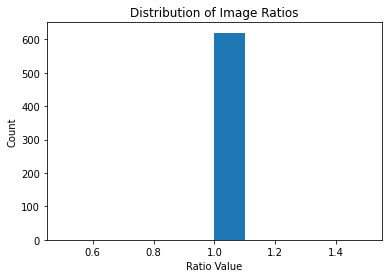

In [4]:


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]
input_shape=(img_rows,img_cols,3)
print(input_shape)
print(len(x_train))


y = dict()
y[0] = []
y[1] = []
for set_name in (y_train,y_testing):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(x=['Train Set', 'Test Set'],y=y[0],name='No',marker=dict(color='#33cc33'),opacity=0.7)
trace1 = go.Bar(x=['Train Set','Test Set'],y=y[1],name='Yes',marker=dict(color='#ff3300'),opacity=0.7)
data = [trace0, trace1]
layout = go.Layout(title='Count of classes in each set',xaxis={'title': 'Set'},yaxis={'title': 'Count'})
fig = go.Figure(data, layout)
iplot(fig)



RATIO_LIST = []
for set in (x_train, x_test):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

**Define Image generators**

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True)
val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d%h$m%s"))
Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

**CNN Architecture**

In [ ]:
from tensorflow.keras.applications import Xception
# load the model
model = Xception()



# summarize the model
model.summary()

# from keras.regularizers import l2
# model=Sequential()
# model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(2,2))


# model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))


# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# # model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.00001)))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.2)
# # model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.0001)))
# # model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(2))
# model.add(Dropout(0.2))
# model.add(Activation("softmax"))
# print(model.summary())


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# sparse_categorical_crossentropy

# Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

# print("Number of weights after calling the model:", len(model.weights)) 


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

**Fit Model**

In [ ]:
epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)


# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=1,
      shuffle=True
      
     )

# print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(
# history.history['val_loss'][-1], 
# history.history['val_accuracy'][-1]))

# saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_testing, predicted_classes, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



Epoch 1/50
14/14 [==============================] - 27s 2s/step - loss: 2.4782 - accuracy: 0.4176 - val_loss: 3.3177 - val_accuracy: 0.8649
Epoch 2/50
14/14 [==============================] - 23s 2s/step - loss: 0.2866 - accuracy: 0.4872 - val_loss: 0.6437 - val_accuracy: 0.5730
Epoch 3/50
14/14 [==============================] - 23s 2s/step - loss: 0.0848 - accuracy: 0.4872 - val_loss: 2.2608 - val_accuracy: 0.3189
Epoch 4/50
14/14 [==============================] - 23s 2s/step - loss: 0.2316 - accuracy: 0.5081 - val_loss: 0.3114 - val_accuracy: 0.4811
Epoch 5/50
14/14 [==============================] - 23s 2s/step - loss: 0.0743 - accuracy: 0.5012 - val_loss: 4.8007 - val_accuracy: 0.0216
Epoch 6/50
14/14 [==============================] - 23s 2s/step - loss: 0.1811 - accuracy: 0.4872 - val_loss: 0.4485 - val_accuracy: 0.4162
Epoch 7/50
14/14 [==============================] - 23s 2s/step - loss: 0.0914 - accuracy: 0.5012 - val_loss: 0.4392 - val_accuracy: 0.5568
Epoch 8/50
14/14 [==

**Plot the training and validation accuracy**

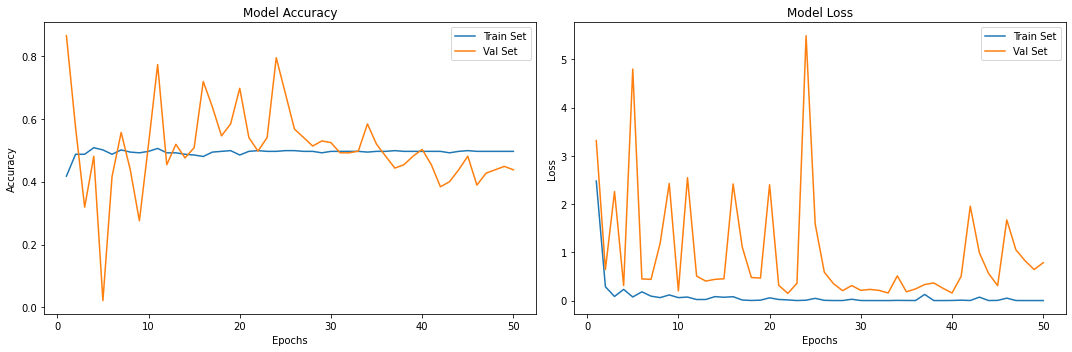

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()


# predictions =model.predict_classes(x_test, verbose=1)
# validate on val set

# predictions = [1 if x>0.5 else 0 for x in predictions]
# print(predictions)
# accuracy = accuracy_score(y_testing, predictions)
# print('Val Accuracy = %.2f' % accuracy)

# confusion_mtx = confusion_matrix(y_testing, predictions) 
# cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

**Calculate roc curve and area under curve**

In [ ]:
fpr , tpr , thresholds = roc_curve ( y_testing , y_val_cat_prob)
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
plot_roc_curve (fpr,tpr)


auc_score=roc_auc_score(y_testing,y_val_cat_prob)
print(auc_score)

**Confusion Matrix**

In [ ]:
his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_testing, predicted_classes, target_names=target_names))


confusion_mtx = confusion_matrix(y_testing, predicted_classes) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)




              precision    recall  f1-score   support

     Class 0       0.34      0.74      0.47        19
     Class 1       0.91      0.64      0.75        76

    accuracy                           0.66        95
   macro avg       0.62      0.69      0.61        95
weighted avg       0.79      0.66      0.70        95



NameError: ignored

**Save** **Model** 

In [ ]:
%tensorboard --port=5036 --logdir $logdir

In [ ]:

model.save('/content/drive/My Drive/Tensorflow/No Aug Path.h5')

In [ ]:
!kill 606

In [5]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
tensorflow.random.set_seed(1234)
from skimage import transform as tf

import random




path='/content/drive/My Drive/Balanced Dataset/'
batch_size=32

# Dataset=['brain_tumor_dataset244','brain_tumor_dataset244starry_night','brain_tumor_dataset244the_wave'
# ,'brain_tumor_dataset244udnie','brain_tumor_dataset244candy','brain_tumor_dataset244composition_vii'
# ,'brain_tumor_dataset244feathers','brain_tumor_dataset244la_muse','brain_tumor_dataset244mosaic','brain_tumor_dataset244scream']


# Dataset=['Original224','starry_night224','the_wave224'
# ,'udnie224','candy224','composition_vii224'
# ,'feathers224','la_muse224','mosaic224','the_scream224']

# Dataset=['Original224','NSTstarry_night_covid224','NSTstarry_night_covid224'
# ,'NSTudnie_covid224','NSTcandy_covid224','NSTcomposition_vii_covid224'
# ,'NSTfeathers_covid224','NSTla_muse_covid224','NSTmosaic_covid224','NSTcomposition_vii_covid224','samplepair_covid224']

Dataset=['Original224','NSTstarry_night224','NSTthe_scream224'
,'NSTudnie224','NSTcandy224','NSTcomposition_vii224'
,'NSTfeathers224','NSTla_muse224','NSTmosaic224','NSTthe_wave224','samplepair224']


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

# (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset)

def data_processing(x_train,y_train,x_test,y_testing):
    y_train=y_train.reshape(y_train.shape[0],1)
    y_testing=y_testing.reshape(y_testing.shape[0],1)
    x_train=x_train.astype('float32')
    x_test=x_test.astype('float32')

    x_train/=255
    x_test/=255
    classes = np.unique(y_train)
    nClasses = len(classes)
    num_classes = len(classes)
    img_rows=x_train[0].shape[0]
    img_cols=x_train[1].shape[0]
    input_shape=(img_rows,img_cols,3)
    return x_train,y_train, x_test,y_testing

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d%h$m%s"))
Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

# from keras.regularizers import l2
# model=Sequential()
# model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(2,2))


# model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))


# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# # model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.00001)))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.2)
# # model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.0001)))
# # model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(2))
# model.add(Dropout(0.2))
# model.add(Activation("softmax"))
# print(model.summary())

from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])




def train_on_x_samples(batch_size=32, steps=100):
        validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)
        train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)
        history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=steps,
                    epochs=epochs,
                    verbose=0,
                    shuffle=True,
                    
                    validation_data=validation_generator )

        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs_range = range(1, len(history.epoch) + 1)
        plt.figure(figsize=(15,5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Train Set')
        plt.plot(epochs_range, val_acc, label='Val Set')
        plt.legend(loc="best")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Train Set')
        plt.plot(epochs_range, val_loss, label='Val Set')
        plt.legend(loc="best")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Model Loss')

        plt.tight_layout()
        plt.show()

        return history










def train_acc_results(x_train,y_train):
    _, train_acc = model.evaluate(x_train, y_train, verbose=0)
    print('Train: %.3f' % (train_acc))
    a=train_acc
    return train_acc

def test_acc_results(x_test,y_testing):
    _, test_acc = model.evaluate(x_test,y_testing, verbose=0)
    print('Test: %.3f' % ( test_acc))
    v=test_acc
    return test_acc


mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


553467904/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

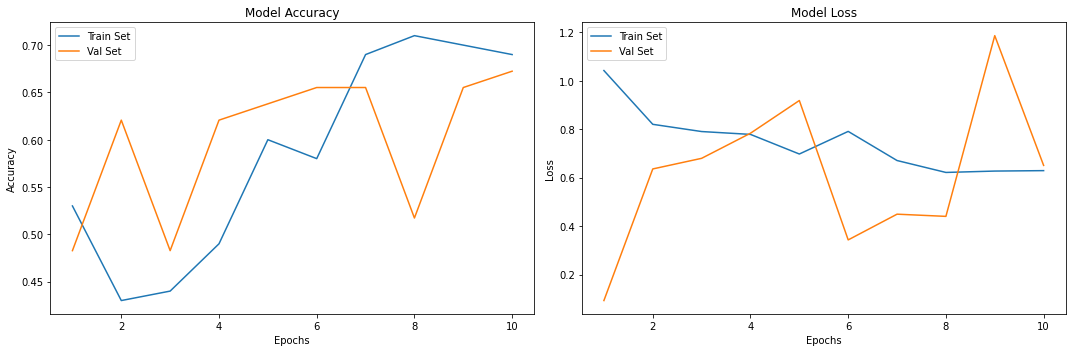

Train: 0.773
Test: 0.638
             Class 0    Class 1  accuracy  macro avg  weighted avg       aug
precision   0.705882   0.609756  0.637931   0.657819      0.656162  Original
recall      0.428571   0.833333  0.637931   0.630952      0.637931  Original
f1-score    0.533333   0.704225  0.637931   0.618779      0.621726  Original
support    28.000000  30.000000  0.637931  58.000000     58.000000  Original


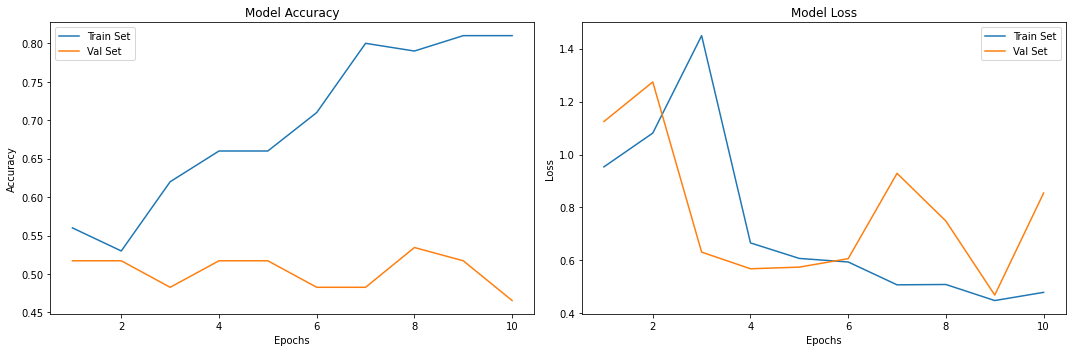

Train: 0.833
Test: 0.655
             Class 0    Class 1  ...  weighted avg             aug
precision   0.700000   0.631579  ...      0.664610  HorizontalFlip
recall      0.500000   0.800000  ...      0.655172  HorizontalFlip
f1-score    0.583333   0.705882  ...      0.646721  HorizontalFlip
support    28.000000  30.000000  ...     58.000000  HorizontalFlip

[4 rows x 6 columns]


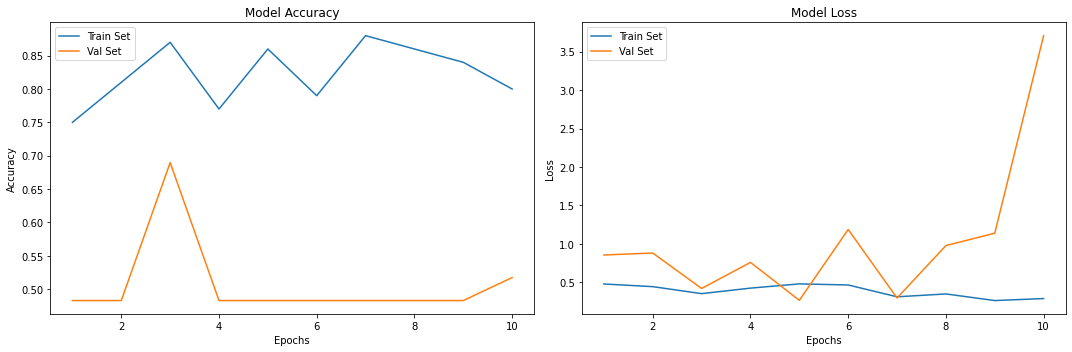

Train: 0.909
Test: 0.655
             Class 0    Class 1  accuracy  macro avg  weighted avg          aug
precision   0.833333   0.608696  0.655172   0.721014      0.717141  vertialFLip
recall      0.357143   0.933333  0.655172   0.645238      0.655172  vertialFLip
f1-score    0.500000   0.736842  0.655172   0.618421      0.622505  vertialFLip
support    28.000000  30.000000  0.655172  58.000000     58.000000  vertialFLip


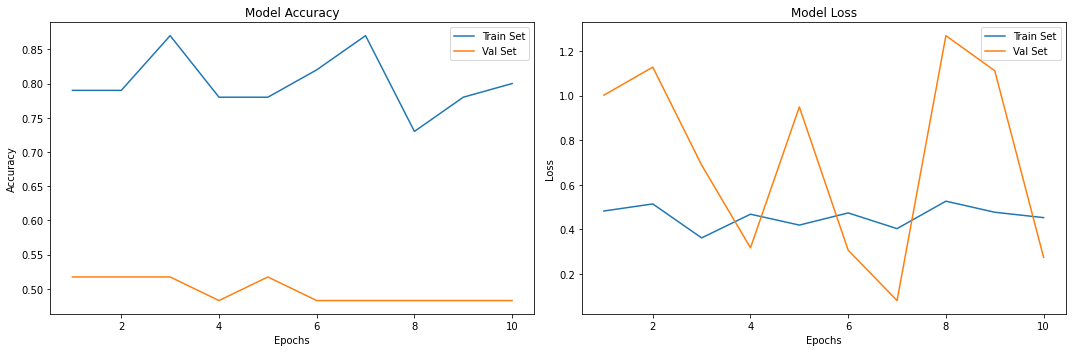

Train: 0.795
Test: 0.586
             Class 0    Class 1  accuracy  macro avg  weighted avg       aug
precision   0.552632   0.650000  0.586207   0.601316      0.602995  Rotation
recall      0.750000   0.433333  0.586207   0.591667      0.586207  Rotation
f1-score    0.636364   0.520000  0.586207   0.578182      0.576176  Rotation
support    28.000000  30.000000  0.586207  58.000000     58.000000  Rotation


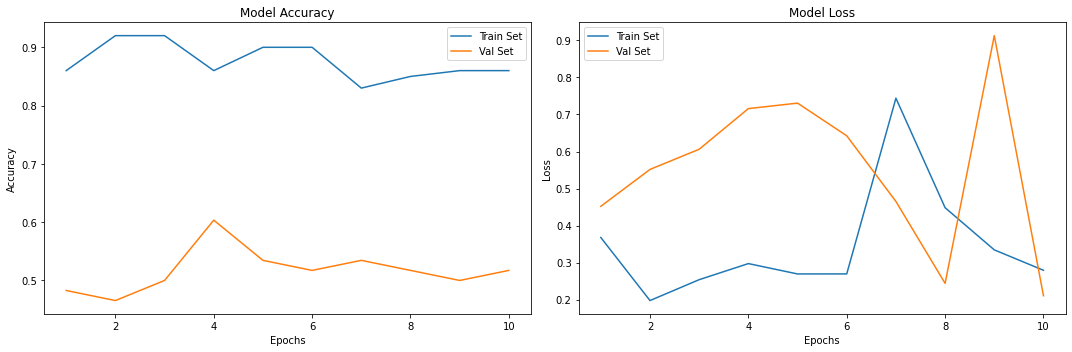

Train: 0.894
Test: 0.586
             Class 0    Class 1  accuracy  macro avg  weighted avg    aug
precision   0.555556   0.636364  0.586207   0.595960      0.597353  shear
recall      0.714286   0.466667  0.586207   0.590476      0.586207  shear
f1-score    0.625000   0.538462  0.586207   0.581731      0.580239  shear
support    28.000000  30.000000  0.586207  58.000000     58.000000  shear


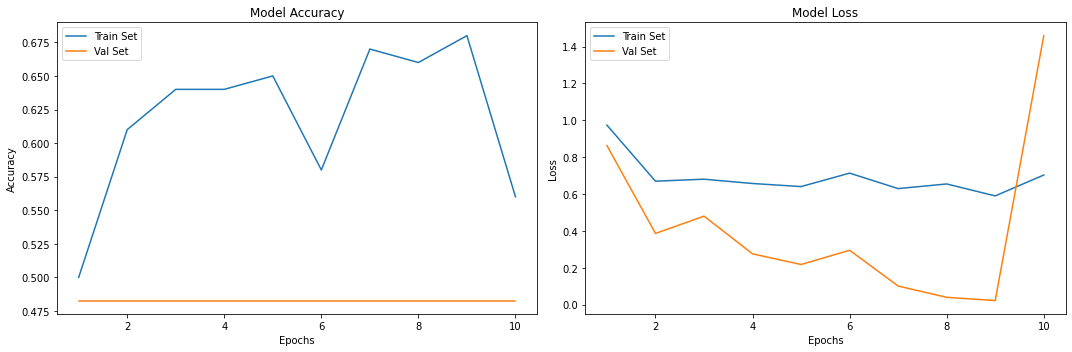

Train: 0.773
Test: 0.569
             Class 0    Class 1  ...  weighted avg                aug
precision   0.600000   0.558140  ...      0.578348  width_shift_range
recall      0.321429   0.800000  ...      0.568966  width_shift_range
f1-score    0.418605   0.657534  ...      0.542189  width_shift_range
support    28.000000  30.000000  ...     58.000000  width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



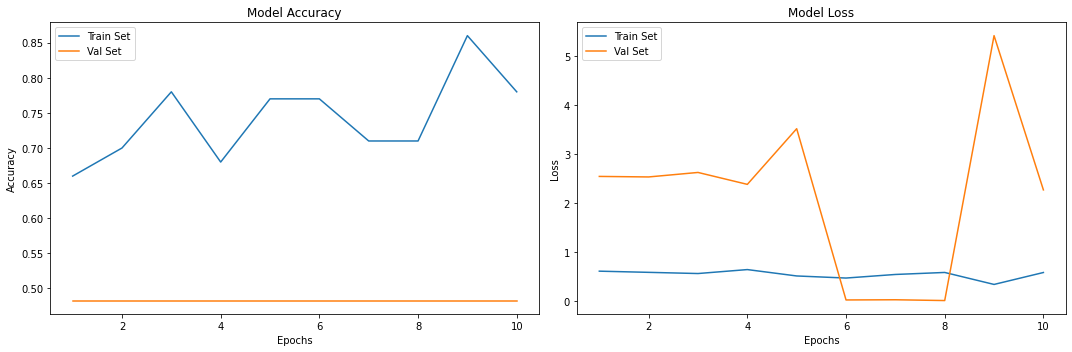

Train: 0.947
Test: 0.586
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.583333   0.588235  ...      0.585869  Horizontal+vertical
recall      0.500000   0.666667  ...      0.586207  Horizontal+vertical
f1-score    0.538462   0.625000  ...      0.583223  Horizontal+vertical
support    28.000000  30.000000  ...     58.000000  Horizontal+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



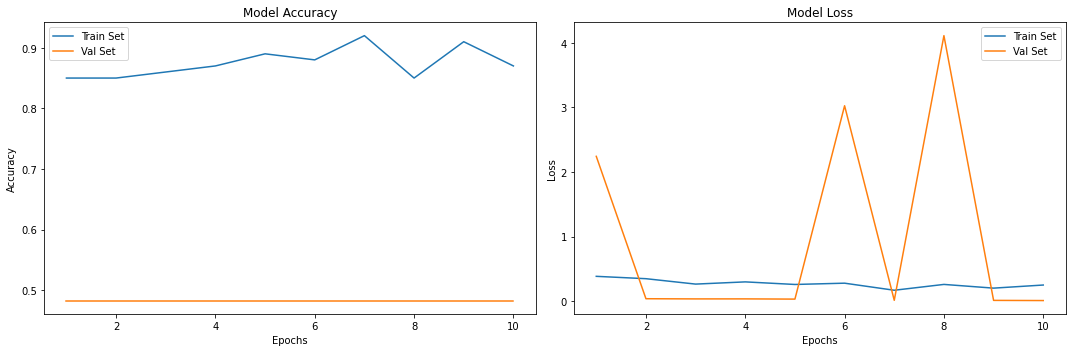

Train: 0.962
Test: 0.655
             Class 0    Class 1  ...  weighted avg                 aug
precision   0.750000   0.619048  ...      0.682266  Horizonta+Rotation
recall      0.428571   0.866667  ...      0.655172  Horizonta+Rotation
f1-score    0.545455   0.722222  ...      0.636886  Horizonta+Rotation
support    28.000000  30.000000  ...     58.000000  Horizonta+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



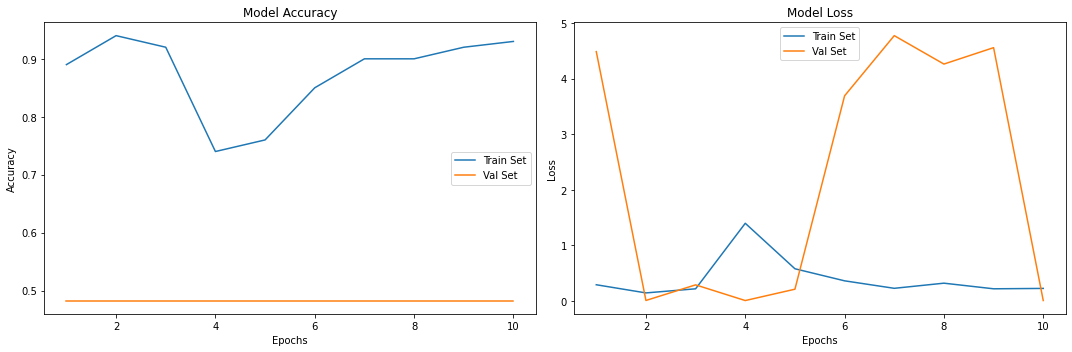

Train: 0.955
Test: 0.724
             Class 0    Class 1  ...  weighted avg              aug
precision   0.772727   0.694444  ...      0.732236  Horizonta+shear
recall      0.607143   0.833333  ...      0.724138  Horizonta+shear
f1-score    0.680000   0.757576  ...      0.720125  Horizonta+shear
support    28.000000  30.000000  ...     58.000000  Horizonta+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



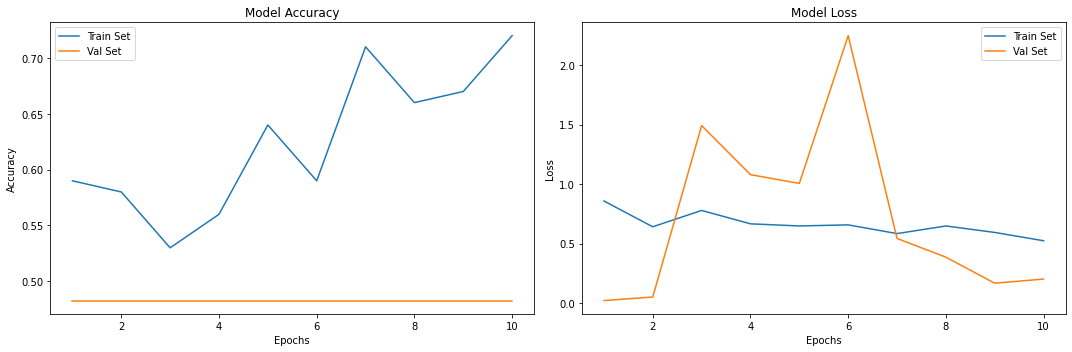

Train: 0.955
Test: 0.724
             Class 0    Class 1  ...  weighted avg                          aug
precision   0.800000   0.684211  ...      0.740109  Horizonta+width_shift_range
recall      0.571429   0.866667  ...      0.724138  Horizonta+width_shift_range
f1-score    0.666667   0.764706  ...      0.717377  Horizonta+width_shift_range
support    28.000000  30.000000  ...     58.000000  Horizonta+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



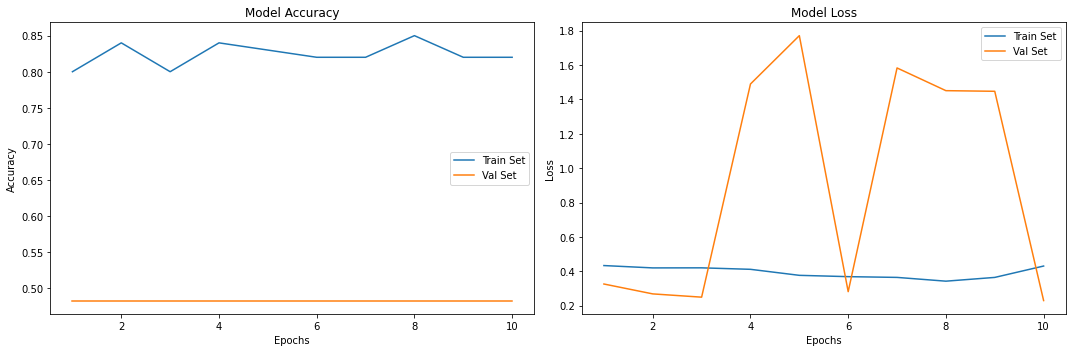

Train: 0.909
Test: 0.638
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.612903   0.666667  ...      0.640712  vertialFLip+Rotation
recall      0.678571   0.600000  ...      0.637931  vertialFLip+Rotation
f1-score    0.644068   0.631579  ...      0.637608  vertialFLip+Rotation
support    28.000000  30.000000  ...     58.000000  vertialFLip+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



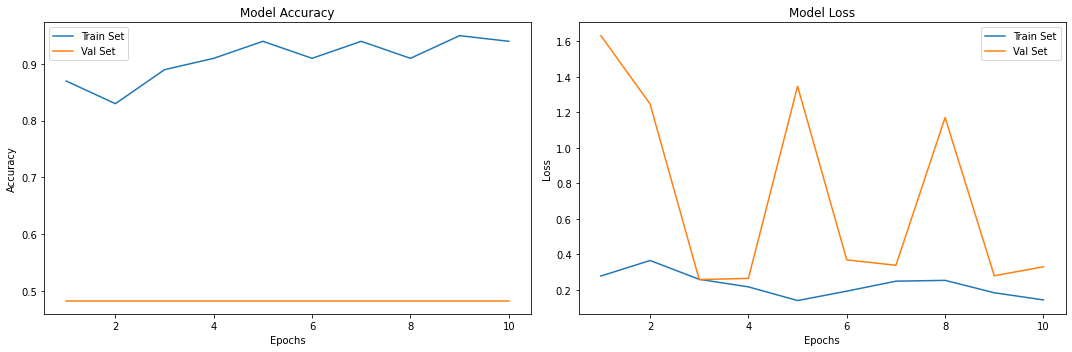

Train: 0.970
Test: 0.552
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.538462   0.562500  ...      0.550895  vertialFLip+Rotation
recall      0.500000   0.600000  ...      0.551724  vertialFLip+Rotation
f1-score    0.518519   0.580645  ...      0.550653  vertialFLip+Rotation
support    28.000000  30.000000  ...     58.000000  vertialFLip+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



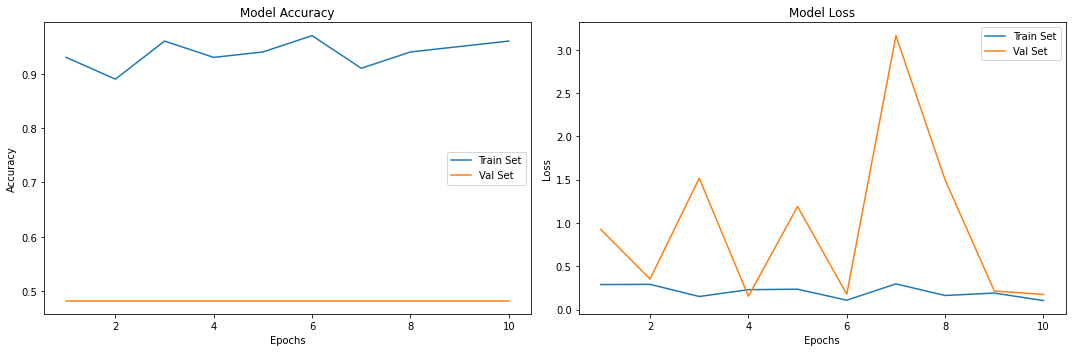

Train: 1.000
Test: 0.690
             Class 0    Class 1  ...  weighted avg                aug
precision   0.727273   0.666667  ...      0.695925  vertialFLip+shear
recall      0.571429   0.800000  ...      0.689655  vertialFLip+shear
f1-score    0.640000   0.727273  ...      0.685141  vertialFLip+shear
support    28.000000  30.000000  ...     58.000000  vertialFLip+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



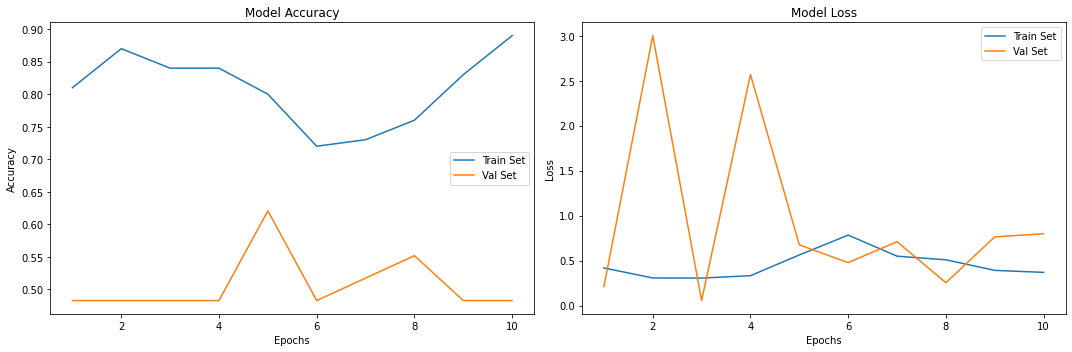

Train: 0.909
Test: 0.638
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.652174   0.628571  ...      0.639966  vertical+width_shift_range
recall      0.535714   0.733333  ...      0.637931  vertical+width_shift_range
f1-score    0.588235   0.676923  ...      0.634108  vertical+width_shift_range
support    28.000000  30.000000  ...     58.000000  vertical+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



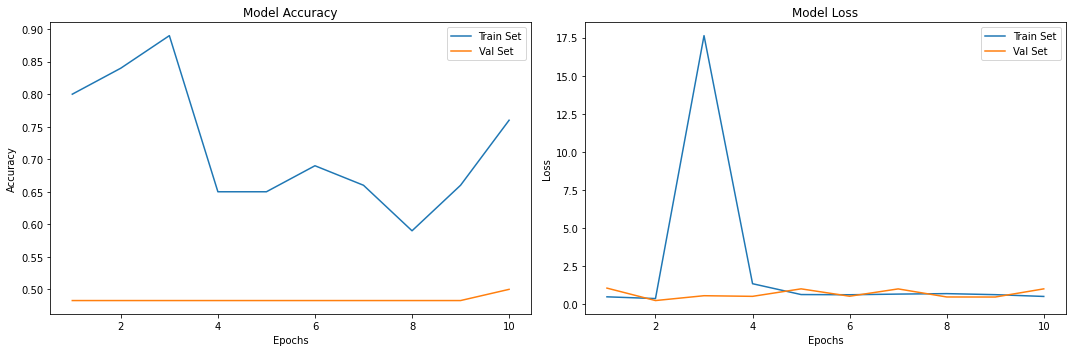

Train: 0.780
Test: 0.655
             Class 0    Class 1  ...  weighted avg                aug
precision   0.666667   0.647059  ...      0.656525  Rotation+vertical
recall      0.571429   0.733333  ...      0.655172  Rotation+vertical
f1-score    0.615385   0.687500  ...      0.652686  Rotation+vertical
support    28.000000  30.000000  ...     58.000000  Rotation+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



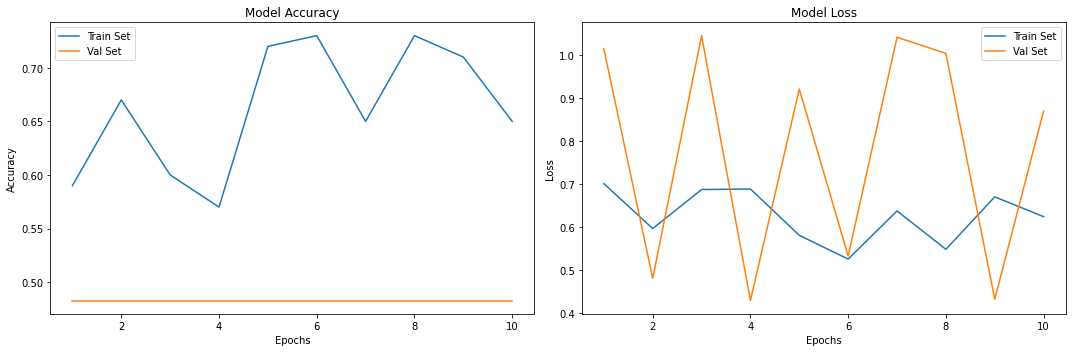

Train: 0.742
Test: 0.621
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.714286   0.590909  ...      0.650470  Horizontal+Rotation
recall      0.357143   0.866667  ...      0.620690  Horizontal+Rotation
f1-score    0.476190   0.702703  ...      0.593352  Horizontal+Rotation
support    28.000000  30.000000  ...     58.000000  Horizontal+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



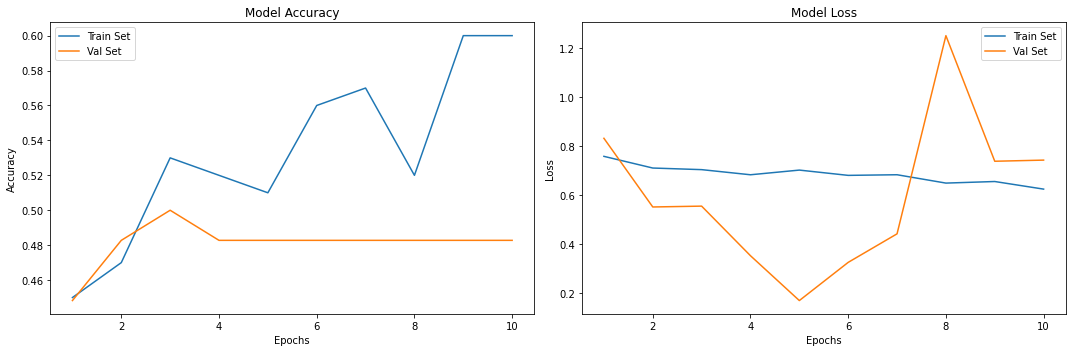

Train: 0.712
Test: 0.517
             Class 0    Class 1  ...  weighted avg             aug
precision   0.500000   0.538462  ...      0.519894  shear+Rotation
recall      0.571429   0.466667  ...      0.517241  shear+Rotation
f1-score    0.533333   0.500000  ...      0.516092  shear+Rotation
support    28.000000  30.000000  ...     58.000000  shear+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



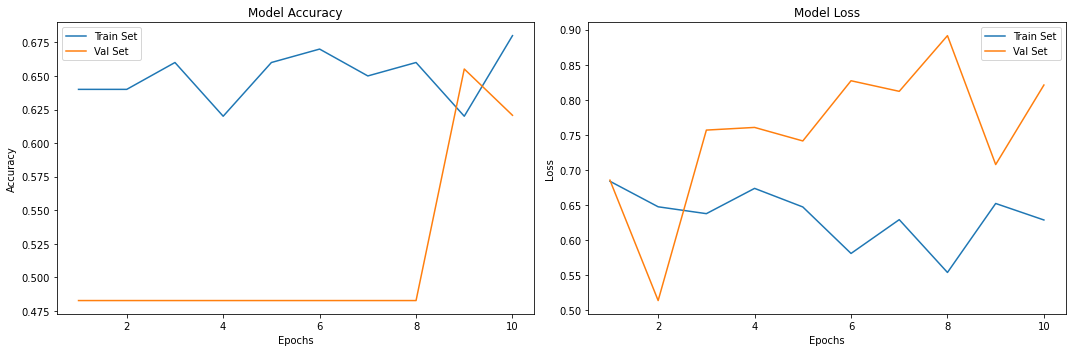

Train: 0.659
Test: 0.534
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.511111   0.615385  ...      0.565046  Rotation+width_shift_range
recall      0.821429   0.266667  ...      0.534483  Rotation+width_shift_range
f1-score    0.630137   0.372093  ...      0.496666  Rotation+width_shift_range
support    28.000000  30.000000  ...     58.000000  Rotation+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



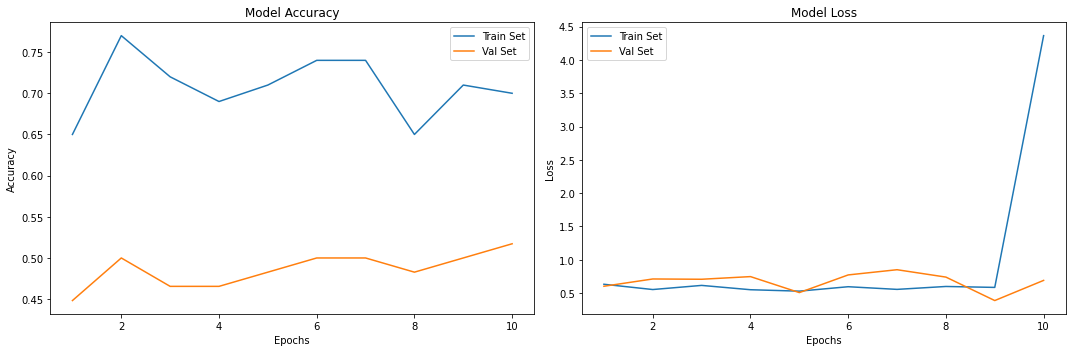

Train: 0.758
Test: 0.655
             Class 0    Class 1  ...  weighted avg             aug
precision   0.700000   0.631579  ...      0.664610  shear+vertical
recall      0.500000   0.800000  ...      0.655172  shear+vertical
f1-score    0.583333   0.705882  ...      0.646721  shear+vertical
support    28.000000  30.000000  ...     58.000000  shear+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



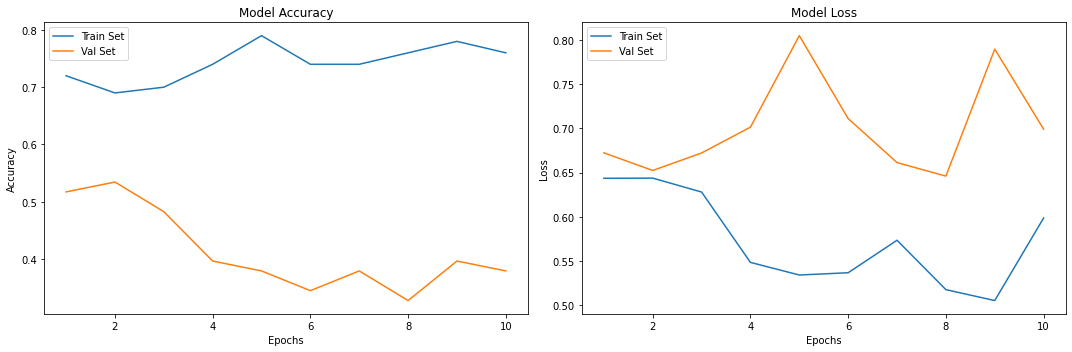

Train: 0.826
Test: 0.621
             Class 0    Class 1  ...  weighted avg               aug
precision   0.636364   0.611111  ...      0.623302  Horizontal+shear
recall      0.500000   0.733333  ...      0.620690  Horizontal+shear
f1-score    0.560000   0.666667  ...      0.615172  Horizontal+shear
support    28.000000  30.000000  ...     58.000000  Horizontal+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



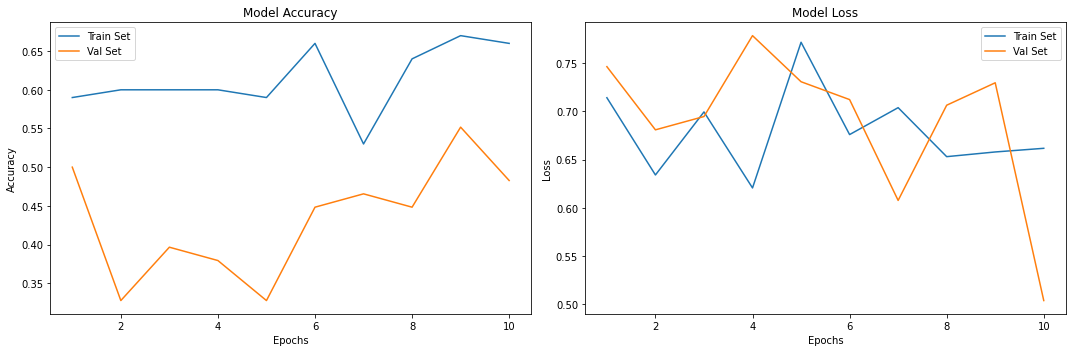

Train: 0.720
Test: 0.586
             Class 0    Class 1  ...  weighted avg             aug
precision   0.666667   0.565217  ...      0.614193  shear+Rotation
recall      0.285714   0.866667  ...      0.586207  shear+Rotation
f1-score    0.400000   0.684211  ...      0.547005  shear+Rotation
support    28.000000  30.000000  ...     58.000000  shear+Rotation

[4 rows x 6 columns]


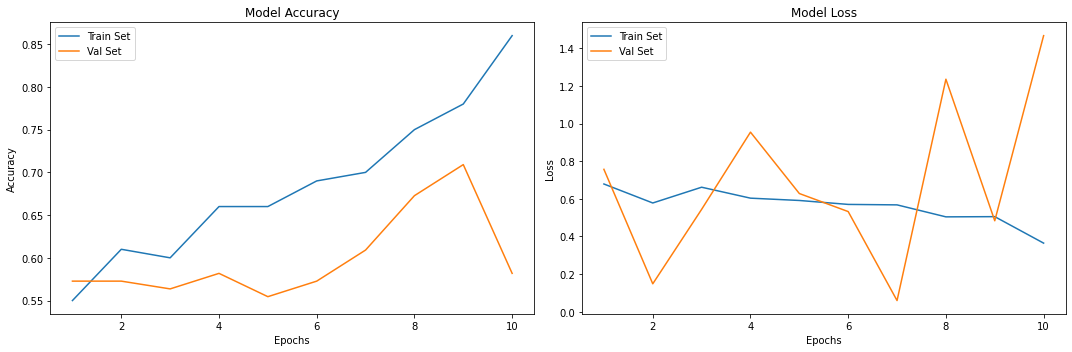

Train: 0.768
Test: 0.600
             Class 0    Class 1  ...  weighted avg                      aug
precision   0.657143   0.573333  ...      0.615238  shear+width_shift_range
recall      0.418182   0.781818  ...      0.600000  shear+width_shift_range
f1-score    0.511111   0.661538  ...      0.586325  shear+width_shift_range
support    55.000000  55.000000  ...    110.000000  shear+width_shift_range

[4 rows x 6 columns]


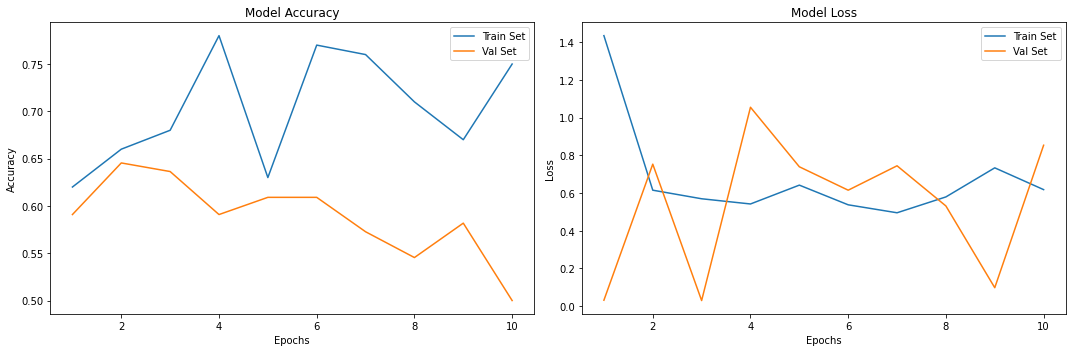

Train: 0.556
Test: 0.591
             Class 0    Class 1  ...  weighted avg           aug
precision   1.000000   0.550000  ...      0.775000  starry_night
recall      0.181818   1.000000  ...      0.590909  starry_night
f1-score    0.307692   0.709677  ...      0.508685  starry_night
support    55.000000  55.000000  ...    110.000000  starry_night

[4 rows x 6 columns]


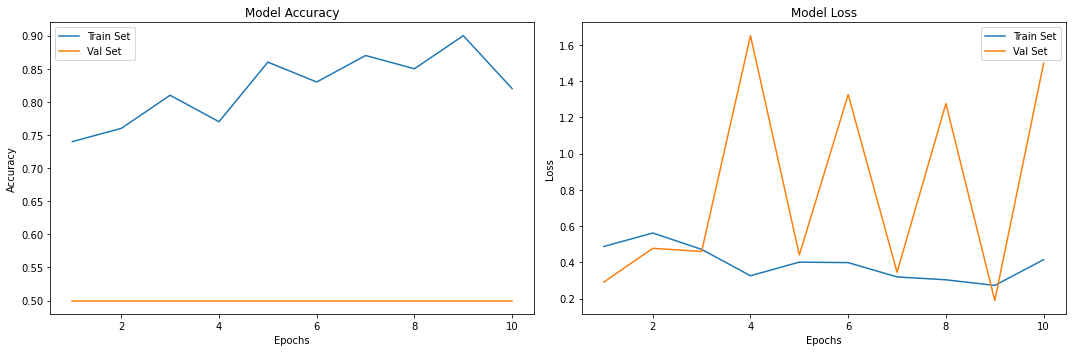

Train: 0.872
Test: 0.573
             Class 0    Class 1  ...  weighted avg                          aug
precision   0.586957   0.562500  ...      0.574728  starry_night_HorizontalFlip
recall      0.490909   0.654545  ...      0.572727  starry_night_HorizontalFlip
f1-score    0.534653   0.605042  ...      0.569848  starry_night_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  starry_night_HorizontalFlip

[4 rows x 6 columns]


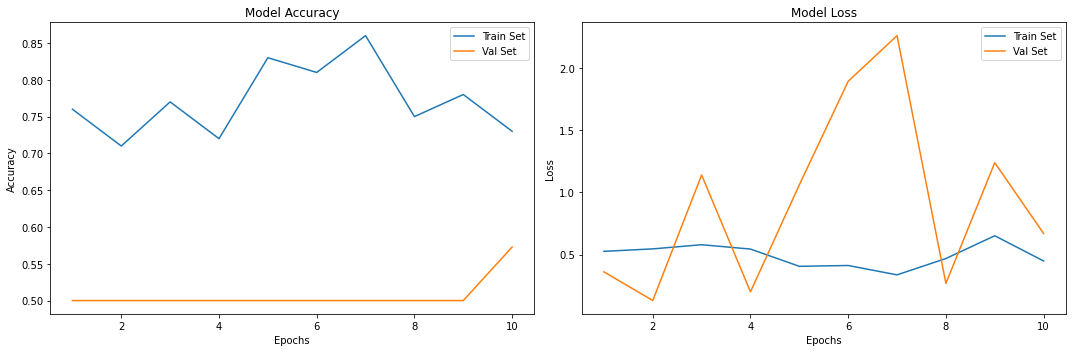

Train: 0.852
Test: 0.618
             Class 0    Class 1  ...  weighted avg                       aug
precision   0.627451   0.610169  ...      0.618810  starry_night_vertialFLip
recall      0.581818   0.654545  ...      0.618182  starry_night_vertialFLip
f1-score    0.603774   0.631579  ...      0.617676  starry_night_vertialFLip
support    55.000000  55.000000  ...    110.000000  starry_night_vertialFLip

[4 rows x 6 columns]


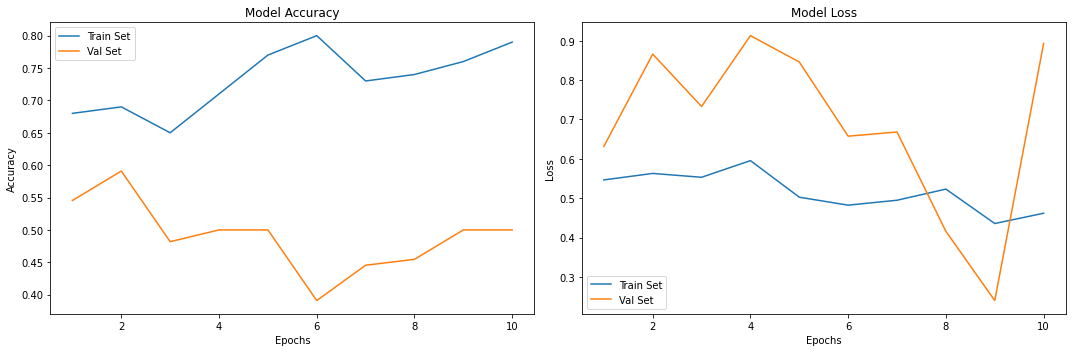

Train: 0.916
Test: 0.618
             Class 0    Class 1  ...  weighted avg                    aug
precision   0.638298   0.603175  ...      0.620736  starry_night_Rotation
recall      0.545455   0.690909  ...      0.618182  starry_night_Rotation
f1-score    0.588235   0.644068  ...      0.616152  starry_night_Rotation
support    55.000000  55.000000  ...    110.000000  starry_night_Rotation

[4 rows x 6 columns]


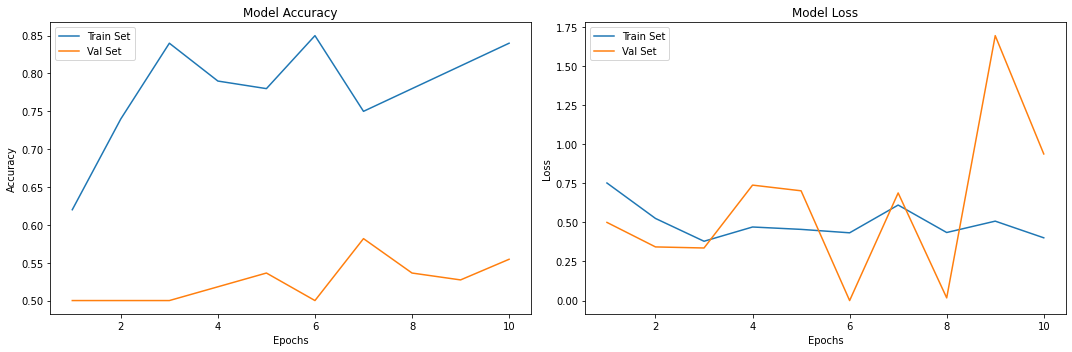

Train: 0.932
Test: 0.655
             Class 0    Class 1  ...  weighted avg                 aug
precision   0.793103   0.604938  ...      0.699021  starry_night_shear
recall      0.418182   0.890909  ...      0.654545  starry_night_shear
f1-score    0.547619   0.720588  ...      0.634104  starry_night_shear
support    55.000000  55.000000  ...    110.000000  starry_night_shear

[4 rows x 6 columns]


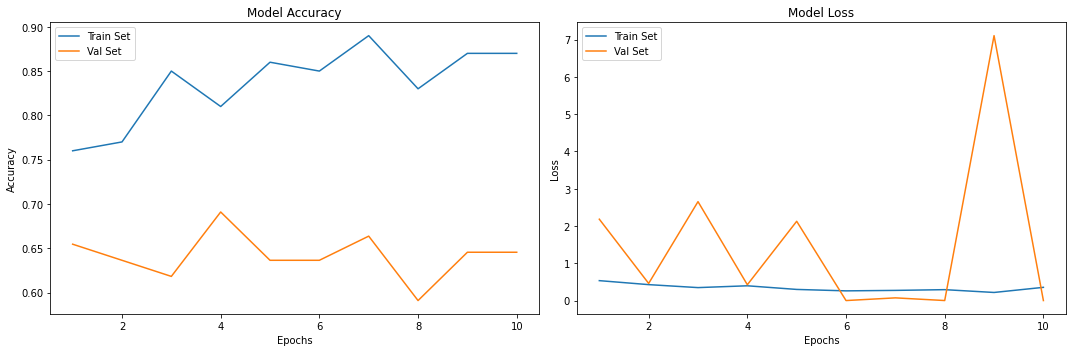

Train: 0.788
Test: 0.609
             Class 0    Class 1  ...  weighted avg                             aug
precision   0.650000   0.585714  ...      0.617857  starry_night_width_shift_range
recall      0.472727   0.745455  ...      0.609091  starry_night_width_shift_range
f1-score    0.547368   0.656000  ...      0.601684  starry_night_width_shift_range
support    55.000000  55.000000  ...    110.000000  starry_night_width_shift_range

[4 rows x 6 columns]


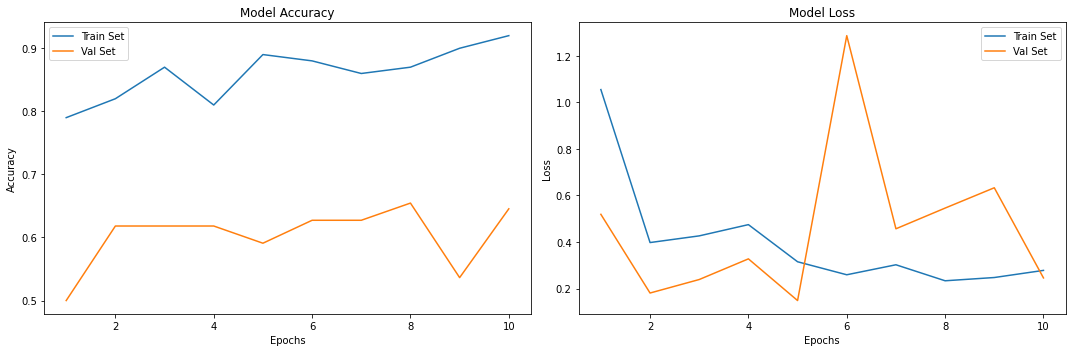

Train: 0.920
Test: 0.645
             Class 0    Class 1  accuracy   macro avg  weighted avg       aug
precision   0.648148   0.642857  0.645455    0.645503      0.645503  the_wave
recall      0.636364   0.654545  0.645455    0.645455      0.645455  the_wave
f1-score    0.642202   0.648649  0.645455    0.645425      0.645425  the_wave
support    55.000000  55.000000  0.645455  110.000000    110.000000  the_wave


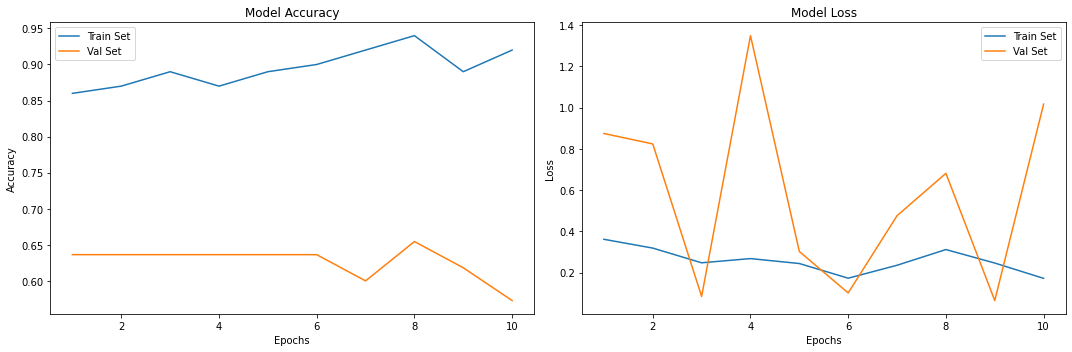

Train: 0.972
Test: 0.636
             Class 0    Class 1  ...  weighted avg                      aug
precision   0.682927   0.608696  ...      0.645811  the_wave_HorizontalFlip
recall      0.509091   0.763636  ...      0.636364  the_wave_HorizontalFlip
f1-score    0.583333   0.677419  ...      0.630376  the_wave_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  the_wave_HorizontalFlip

[4 rows x 6 columns]


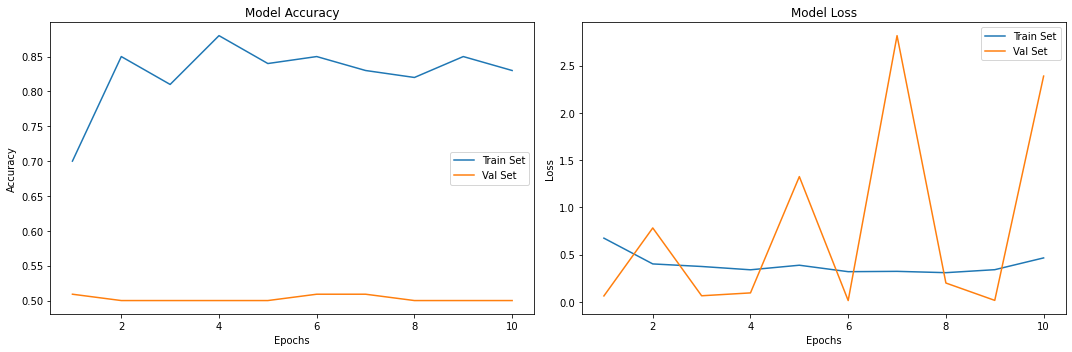

Train: 0.884
Test: 0.600
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.593220   0.607843  ...      0.600532  the_wave_vertialFLip
recall      0.636364   0.563636  ...      0.600000  the_wave_vertialFLip
f1-score    0.614035   0.584906  ...      0.599470  the_wave_vertialFLip
support    55.000000  55.000000  ...    110.000000  the_wave_vertialFLip

[4 rows x 6 columns]


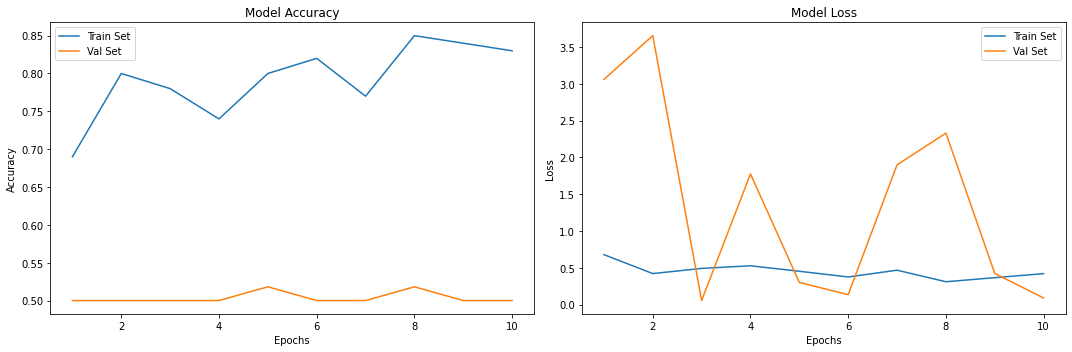

Train: 0.892
Test: 0.618
             Class 0    Class 1  ...  weighted avg                aug
precision   0.696970   0.584416  ...      0.640693  the_wave_Rotation
recall      0.418182   0.818182  ...      0.618182  the_wave_Rotation
f1-score    0.522727   0.681818  ...      0.602273  the_wave_Rotation
support    55.000000  55.000000  ...    110.000000  the_wave_Rotation

[4 rows x 6 columns]


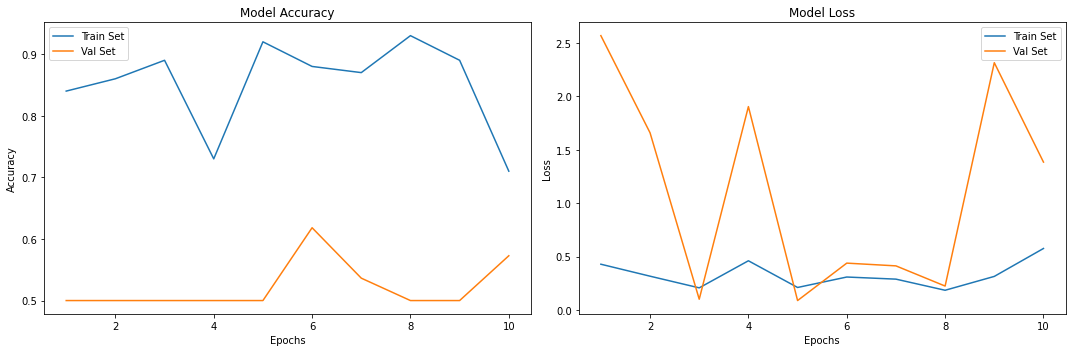

Train: 0.928
Test: 0.655
             Class 0    Class 1  ...  weighted avg             aug
precision   0.654545   0.654545  ...      0.654545  the_wave_shear
recall      0.654545   0.654545  ...      0.654545  the_wave_shear
f1-score    0.654545   0.654545  ...      0.654545  the_wave_shear
support    55.000000  55.000000  ...    110.000000  the_wave_shear

[4 rows x 6 columns]


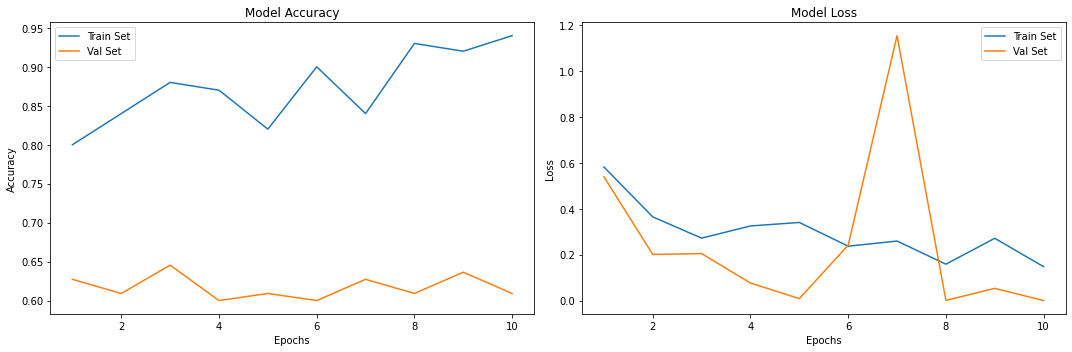

Train: 0.940
Test: 0.591
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.608696   0.578125  ...      0.593410  the_wave_width_shift_range
recall      0.509091   0.672727  ...      0.590909  the_wave_width_shift_range
f1-score    0.554455   0.621849  ...      0.588152  the_wave_width_shift_range
support    55.000000  55.000000  ...    110.000000  the_wave_width_shift_range

[4 rows x 6 columns]


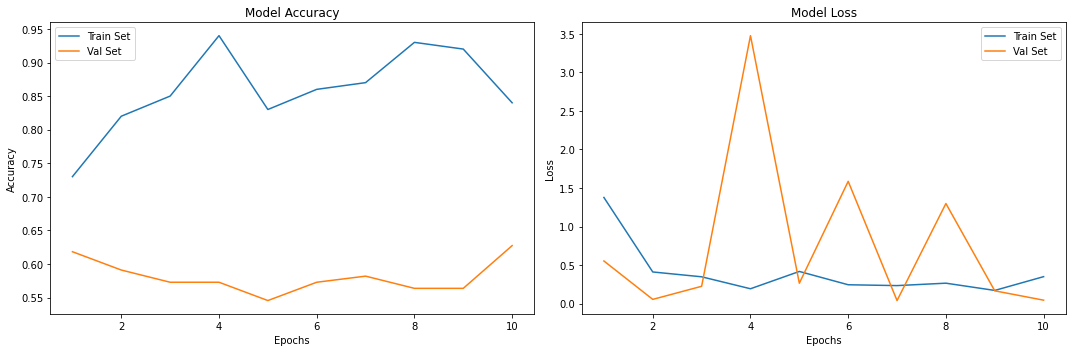

Train: 0.944
Test: 0.655
             Class 0    Class 1  accuracy   macro avg  weighted avg    aug
precision   0.660377   0.649123  0.654545    0.654750      0.654750  udnie
recall      0.636364   0.672727  0.654545    0.654545      0.654545  udnie
f1-score    0.648148   0.660714  0.654545    0.654431      0.654431  udnie
support    55.000000  55.000000  0.654545  110.000000    110.000000  udnie


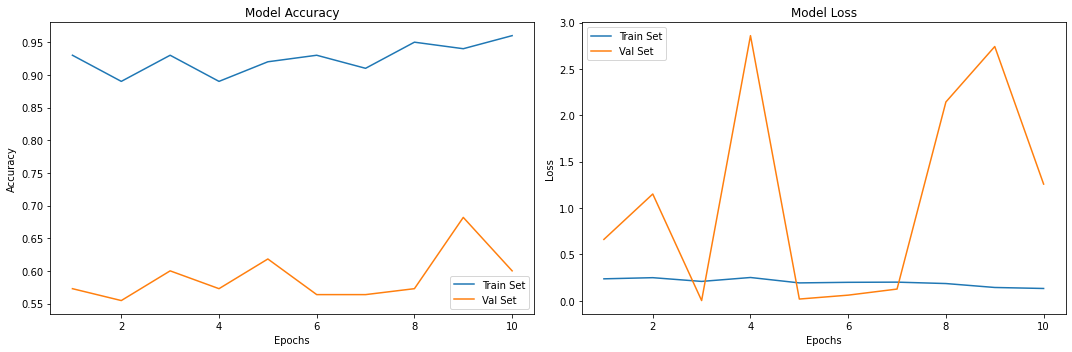

Train: 0.984
Test: 0.636
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.666667   0.615385  ...      0.641026  udnie_HorizontalFlip
recall      0.545455   0.727273  ...      0.636364  udnie_HorizontalFlip
f1-score    0.600000   0.666667  ...      0.633333  udnie_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  udnie_HorizontalFlip

[4 rows x 6 columns]


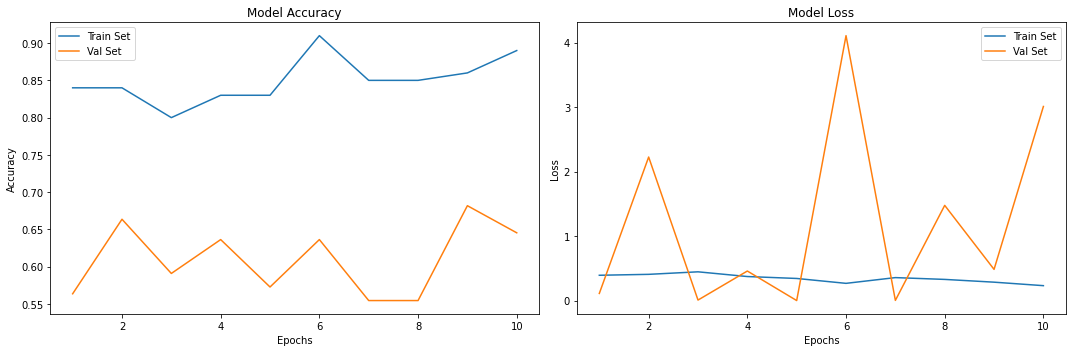

Train: 0.960
Test: 0.609
             Class 0    Class 1  ...  weighted avg                aug
precision   0.630435   0.593750  ...      0.612092  udnie_vertialFLip
recall      0.527273   0.690909  ...      0.609091  udnie_vertialFLip
f1-score    0.574257   0.638655  ...      0.606456  udnie_vertialFLip
support    55.000000  55.000000  ...    110.000000  udnie_vertialFLip

[4 rows x 6 columns]


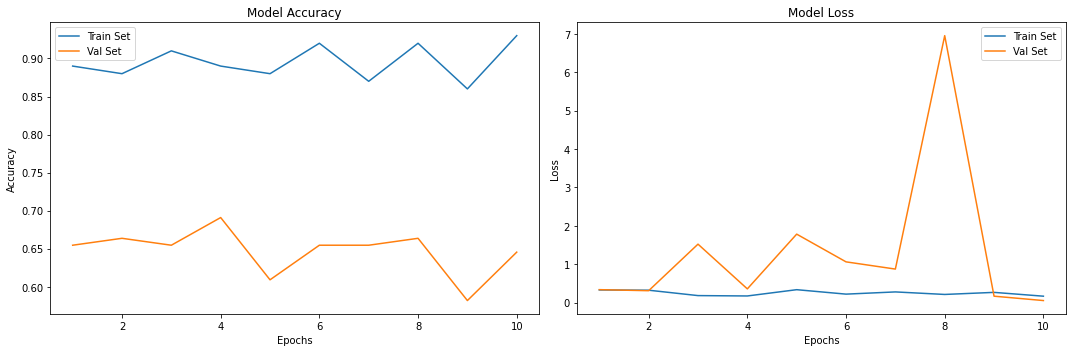

Train: 0.976
Test: 0.618
             Class 0    Class 1  ...  weighted avg             aug
precision   0.603175   0.638298  ...      0.620736  udnie_Rotation
recall      0.690909   0.545455  ...      0.618182  udnie_Rotation
f1-score    0.644068   0.588235  ...      0.616152  udnie_Rotation
support    55.000000  55.000000  ...    110.000000  udnie_Rotation

[4 rows x 6 columns]


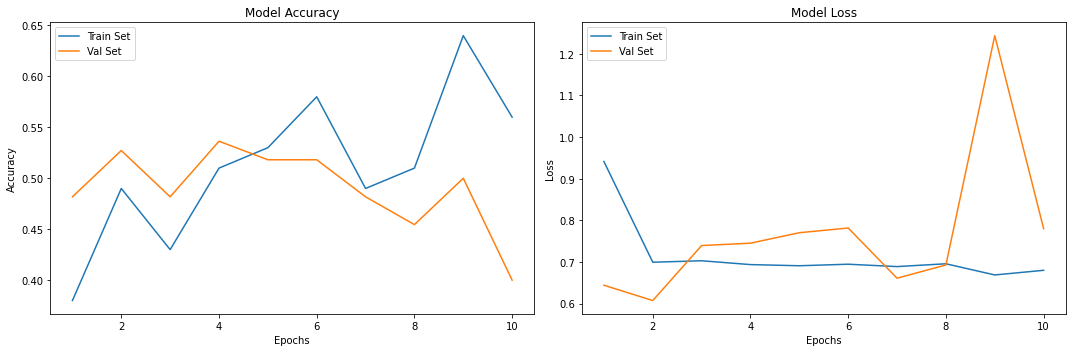

Train: 0.860
Test: 0.645
             Class 0    Class 1  ...  weighted avg          aug
precision   0.633333   0.660000  ...      0.646667  udnie_shear
recall      0.690909   0.600000  ...      0.645455  udnie_shear
f1-score    0.660870   0.628571  ...      0.644720  udnie_shear
support    55.000000  55.000000  ...    110.000000  udnie_shear

[4 rows x 6 columns]


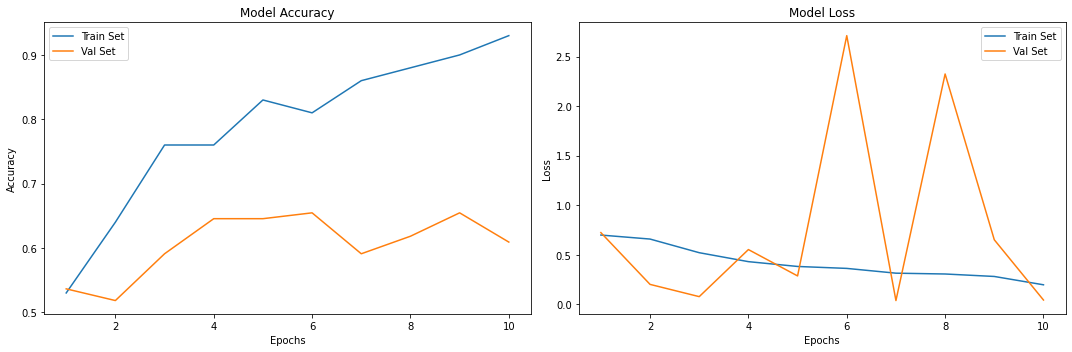

Train: 0.908
Test: 0.627
             Class 0    Class 1  ...  weighted avg                      aug
precision   0.675000   0.600000  ...      0.637500  udnie_width_shift_range
recall      0.490909   0.763636  ...      0.627273  udnie_width_shift_range
f1-score    0.568421   0.672000  ...      0.620211  udnie_width_shift_range
support    55.000000  55.000000  ...    110.000000  udnie_width_shift_range

[4 rows x 6 columns]


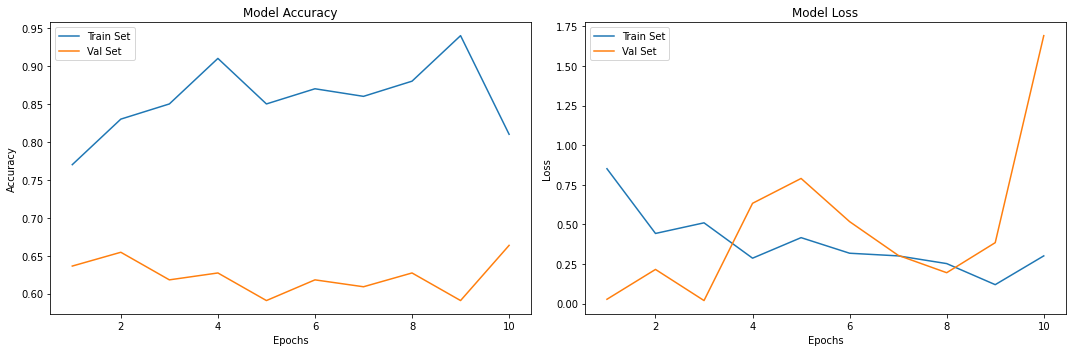

Train: 0.920
Test: 0.600
             Class 0    Class 1  accuracy   macro avg  weighted avg    aug
precision   0.615385   0.603448  0.609091    0.609416      0.609416  candy
recall      0.581818   0.636364  0.609091    0.609091      0.609091  candy
f1-score    0.598131   0.619469  0.609091    0.608800      0.608800  candy
support    55.000000  55.000000  0.609091  110.000000    110.000000  candy


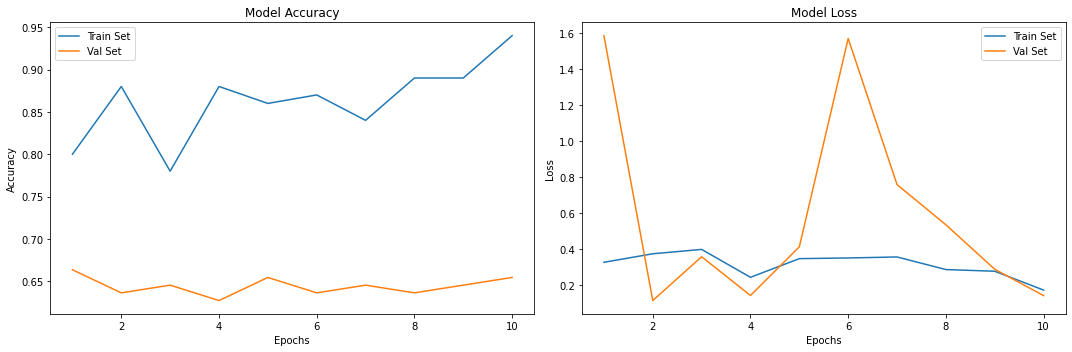

Train: 0.952
Test: 0.600
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.603774   0.596491  ...      0.600132  candy_HorizontalFlip
recall      0.581818   0.618182  ...      0.600000  candy_HorizontalFlip
f1-score    0.592593   0.607143  ...      0.599868  candy_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  candy_HorizontalFlip

[4 rows x 6 columns]


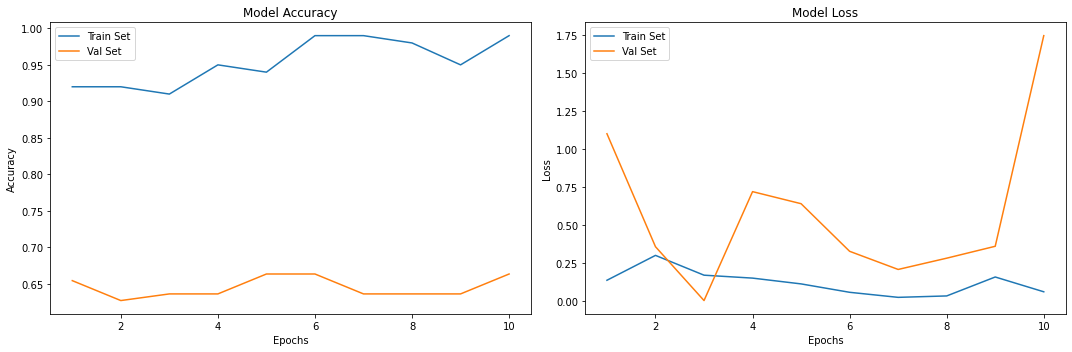

Train: 0.988
Test: 0.627
             Class 0    Class 1  ...  weighted avg                aug
precision   0.640000   0.616667  ...      0.628333  candy_vertialFLip
recall      0.581818   0.672727  ...      0.627273  candy_vertialFLip
f1-score    0.609524   0.643478  ...      0.626501  candy_vertialFLip
support    55.000000  55.000000  ...    110.000000  candy_vertialFLip

[4 rows x 6 columns]


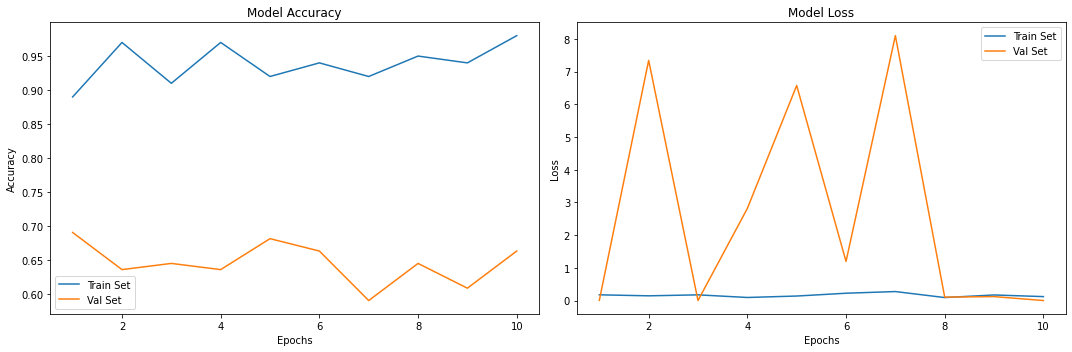

Train: 0.988
Test: 0.673
             Class 0    Class 1  ...  weighted avg             aug
precision   0.702128   0.650794  ...      0.676461  candy_Rotation
recall      0.600000   0.745455  ...      0.672727  candy_Rotation
f1-score    0.647059   0.694915  ...      0.670987  candy_Rotation
support    55.000000  55.000000  ...    110.000000  candy_Rotation

[4 rows x 6 columns]


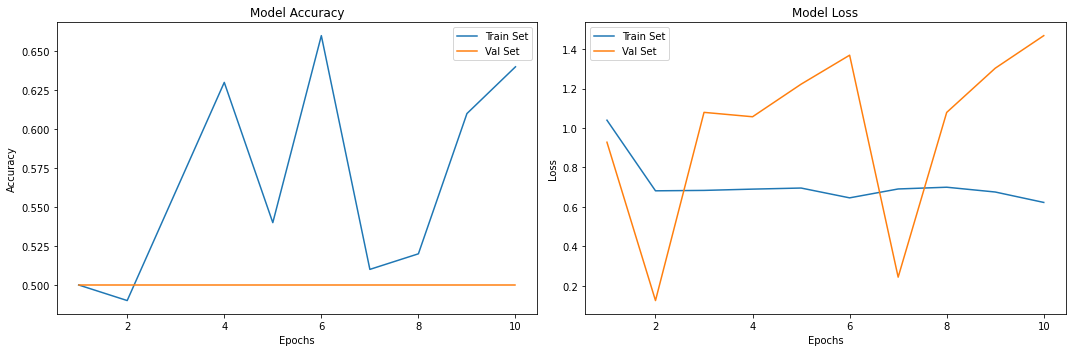

Train: 0.900
Test: 0.655
             Class 0    Class 1  ...  weighted avg          aug
precision   0.757576   0.610390  ...      0.683983  candy_shear
recall      0.454545   0.854545  ...      0.654545  candy_shear
f1-score    0.568182   0.712121  ...      0.640152  candy_shear
support    55.000000  55.000000  ...    110.000000  candy_shear

[4 rows x 6 columns]


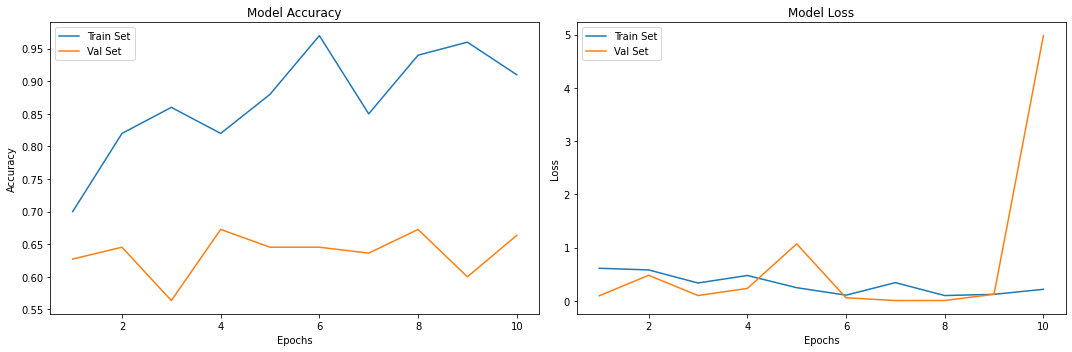

Train: 0.948
Test: 0.673
             Class 0    Class 1  ...  weighted avg                      aug
precision   0.827586   0.617284  ...      0.722435  candy_width_shift_range
recall      0.436364   0.909091  ...      0.672727  candy_width_shift_range
f1-score    0.571429   0.735294  ...      0.653361  candy_width_shift_range
support    55.000000  55.000000  ...    110.000000  candy_width_shift_range

[4 rows x 6 columns]


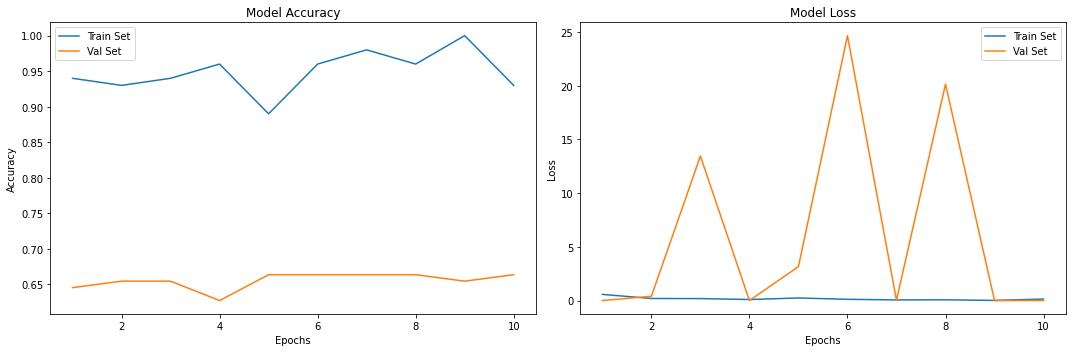

Train: 0.984
Test: 0.691
             Class 0    Class 1  ...  weighted avg              aug
precision   0.756098   0.652174  ...      0.704136  composition_vii
recall      0.563636   0.818182  ...      0.690909  composition_vii
f1-score    0.645833   0.725806  ...      0.685820  composition_vii
support    55.000000  55.000000  ...    110.000000  composition_vii

[4 rows x 6 columns]


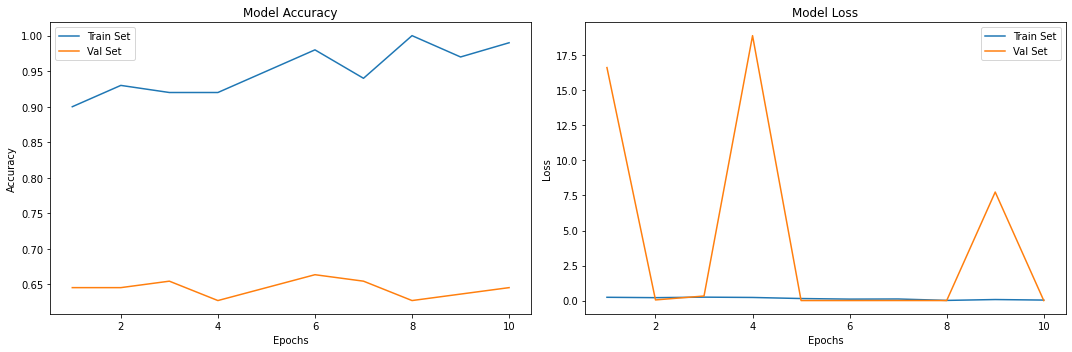

Train: 1.000
Test: 0.664
             Class 0    Class 1  ...  weighted avg                             aug
precision   0.687500   0.645161  ...      0.666331  composition_vii_HorizontalFlip
recall      0.600000   0.727273  ...      0.663636  composition_vii_HorizontalFlip
f1-score    0.640777   0.683761  ...      0.662269  composition_vii_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  composition_vii_HorizontalFlip

[4 rows x 6 columns]


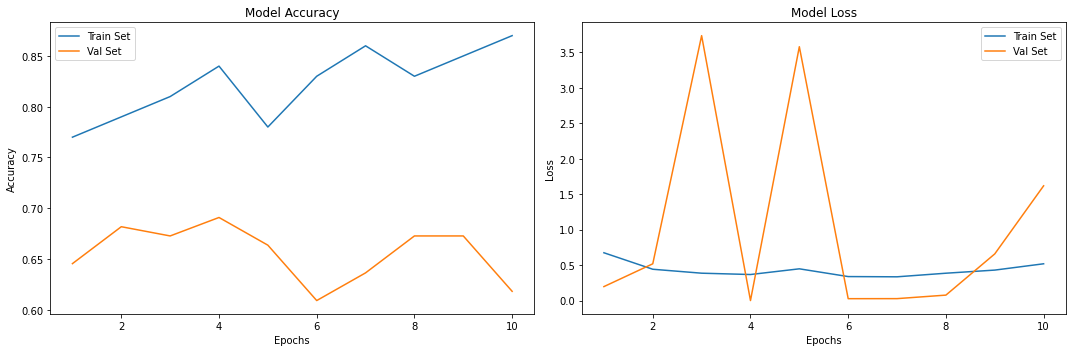

Train: 0.908
Test: 0.691
             Class 0    Class 1  ...  weighted avg                          aug
precision   0.677966   0.705882  ...      0.691924  composition_vii_vertialFLip
recall      0.727273   0.654545  ...      0.690909  composition_vii_vertialFLip
f1-score    0.701754   0.679245  ...      0.690500  composition_vii_vertialFLip
support    55.000000  55.000000  ...    110.000000  composition_vii_vertialFLip

[4 rows x 6 columns]


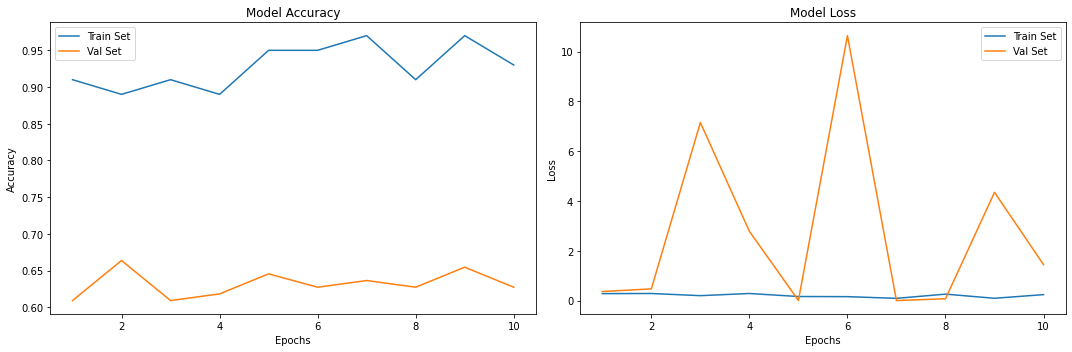

Train: 1.000
Test: 0.673
             Class 0    Class 1  ...  weighted avg                       aug
precision   0.744681   0.682540  ...      0.713610  composition_vii_Rotation
recall      0.636364   0.781818  ...      0.709091  composition_vii_Rotation
f1-score    0.686275   0.728814  ...      0.707544  composition_vii_Rotation
support    55.000000  55.000000  ...    110.000000  composition_vii_Rotation

[4 rows x 6 columns]


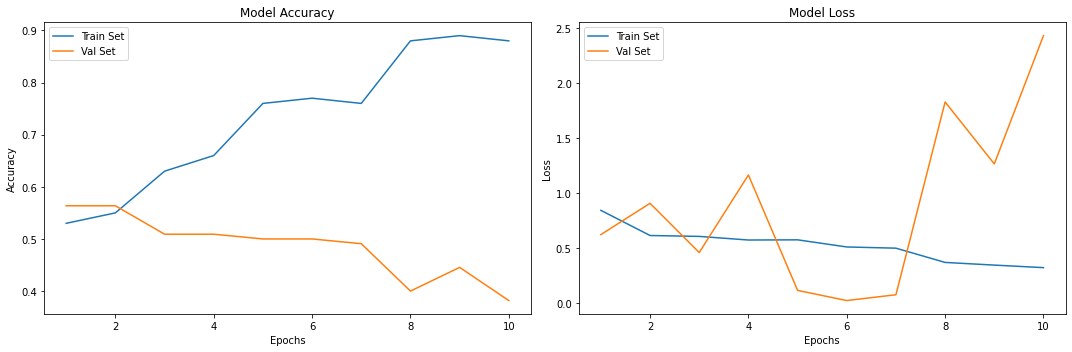

Train: 0.980
Test: 0.673
             Class 0    Class 1  ...  weighted avg                    aug
precision   0.743590   0.633803  ...      0.688696  composition_vii_shear
recall      0.527273   0.818182  ...      0.672727  composition_vii_shear
f1-score    0.617021   0.714286  ...      0.665653  composition_vii_shear
support    55.000000  55.000000  ...    110.000000  composition_vii_shear

[4 rows x 6 columns]


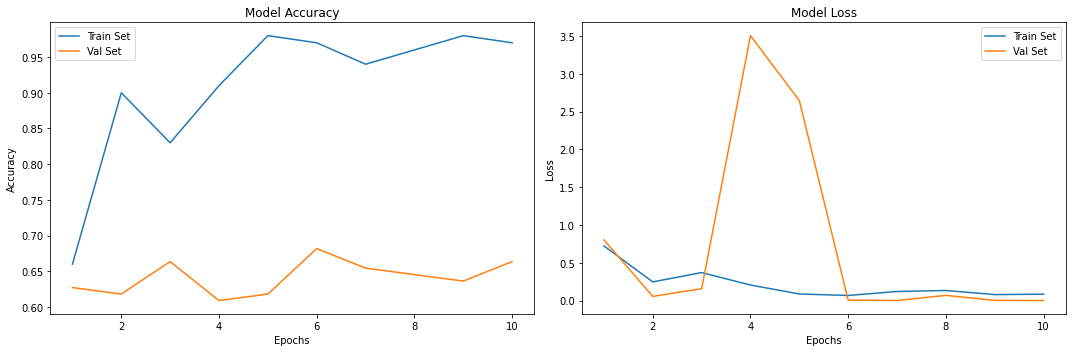

Train: 0.996
Test: 0.655
             Class 0  ...                                aug
precision   0.688889  ...  composition_vii_width_shift_range
recall      0.563636  ...  composition_vii_width_shift_range
f1-score    0.620000  ...  composition_vii_width_shift_range
support    55.000000  ...  composition_vii_width_shift_range

[4 rows x 6 columns]


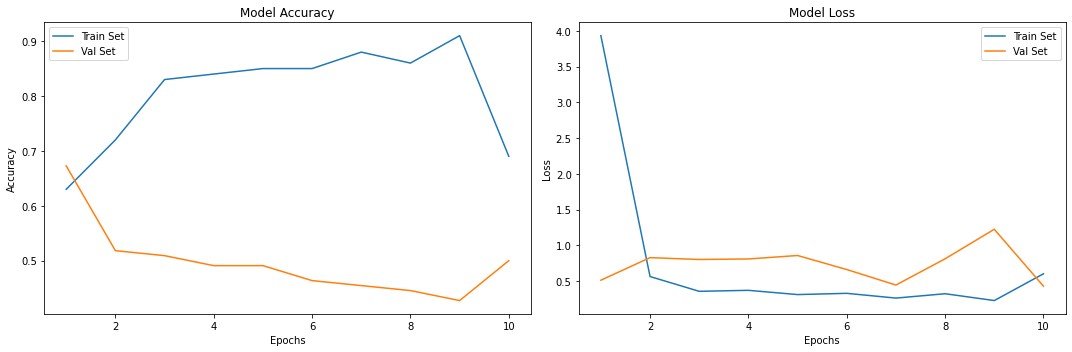

Train: 0.800
Test: 0.727
             Class 0    Class 1  accuracy   macro avg  weighted avg       aug
precision   0.704918   0.755102  0.727273    0.730010      0.730010  feathers
recall      0.781818   0.672727  0.727273    0.727273      0.727273  feathers
f1-score    0.741379   0.711538  0.727273    0.726459      0.726459  feathers
support    55.000000  55.000000  0.727273  110.000000    110.000000  feathers


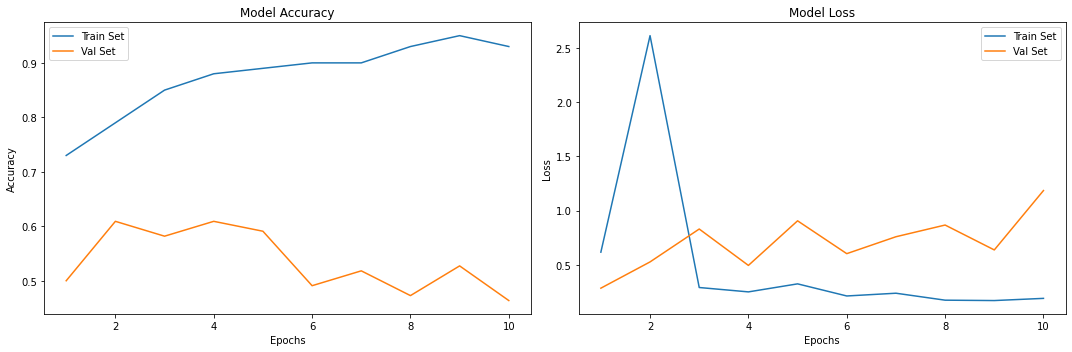

Train: 0.984
Test: 0.655
             Class 0    Class 1  ...  weighted avg                      aug
precision   0.688889   0.630769  ...      0.659829  feathers_HorizontalFlip
recall      0.563636   0.745455  ...      0.654545  feathers_HorizontalFlip
f1-score    0.620000   0.683333  ...      0.651667  feathers_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  feathers_HorizontalFlip

[4 rows x 6 columns]


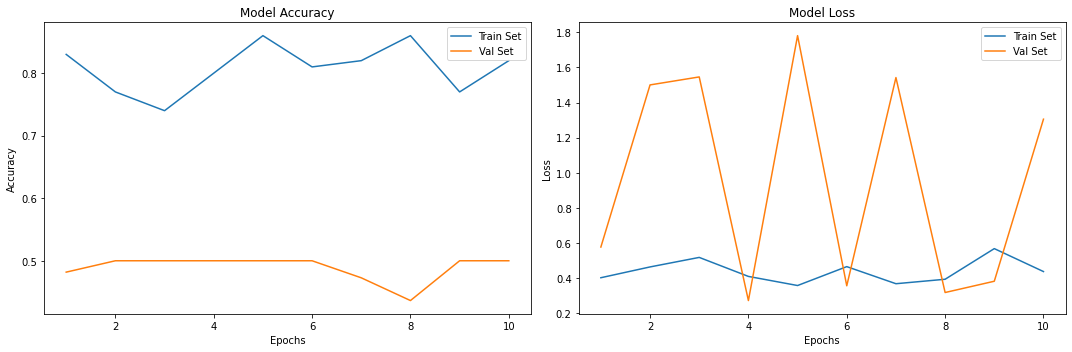

Train: 0.900
Test: 0.682
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.678571   0.685185  ...      0.681878  feathers_vertialFLip
recall      0.690909   0.672727  ...      0.681818  feathers_vertialFLip
f1-score    0.684685   0.678899  ...      0.681792  feathers_vertialFLip
support    55.000000  55.000000  ...    110.000000  feathers_vertialFLip

[4 rows x 6 columns]


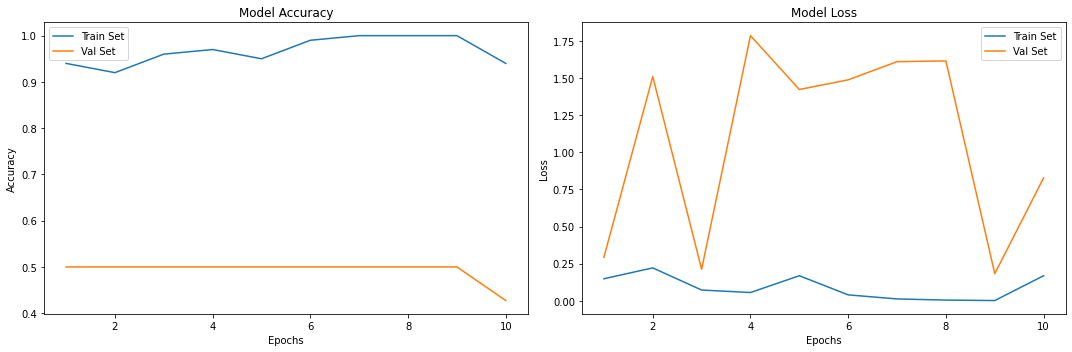

Train: 0.828
Test: 0.664
             Class 0    Class 1  ...  weighted avg                aug
precision   0.821429   0.609756  ...      0.715592  feathers_Rotation
recall      0.418182   0.909091  ...      0.663636  feathers_Rotation
f1-score    0.554217   0.729927  ...      0.642072  feathers_Rotation
support    55.000000  55.000000  ...    110.000000  feathers_Rotation

[4 rows x 6 columns]


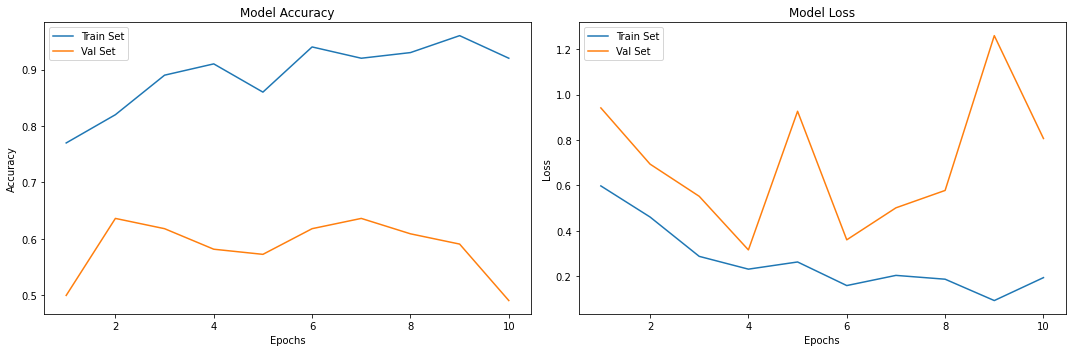

Train: 0.772
Test: 0.645
             Class 0    Class 1  ...  weighted avg             aug
precision   0.637931   0.653846  ...      0.645889  feathers_shear
recall      0.672727   0.618182  ...      0.645455  feathers_shear
f1-score    0.654867   0.635514  ...      0.645191  feathers_shear
support    55.000000  55.000000  ...    110.000000  feathers_shear

[4 rows x 6 columns]


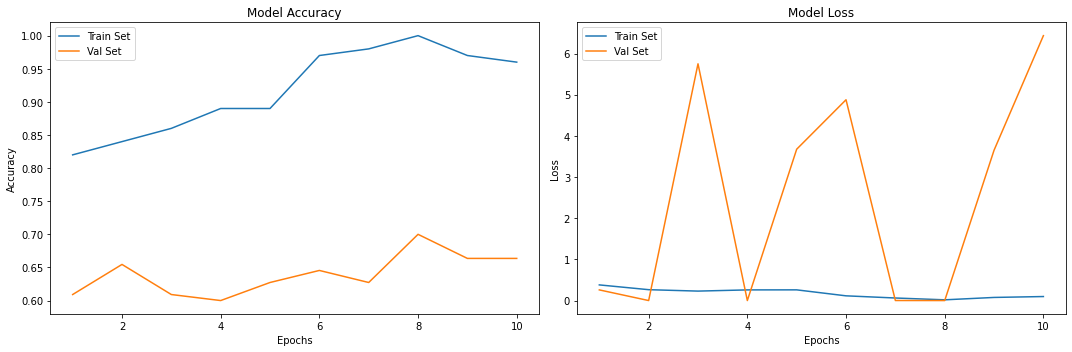

Train: 0.968
Test: 0.582
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.595745   0.571429  ...      0.583587  feathers_width_shift_range
recall      0.509091   0.654545  ...      0.581818  feathers_width_shift_range
f1-score    0.549020   0.610169  ...      0.579595  feathers_width_shift_range
support    55.000000  55.000000  ...    110.000000  feathers_width_shift_range

[4 rows x 6 columns]


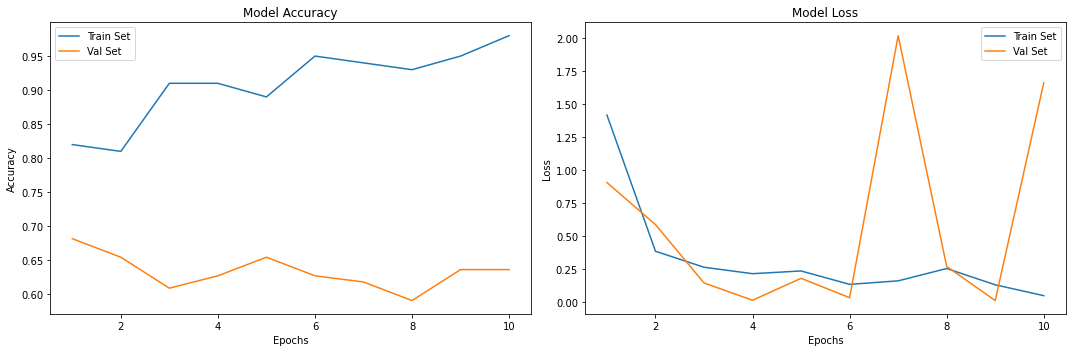

Train: 0.980
Test: 0.736
             Class 0    Class 1  accuracy   macro avg  weighted avg      aug
precision   0.795455   0.696970  0.736364    0.746212      0.746212  la_muse
recall      0.636364   0.836364  0.736364    0.736364      0.736364  la_muse
f1-score    0.707071   0.760331  0.736364    0.733701      0.733701  la_muse
support    55.000000  55.000000  0.736364  110.000000    110.000000  la_muse


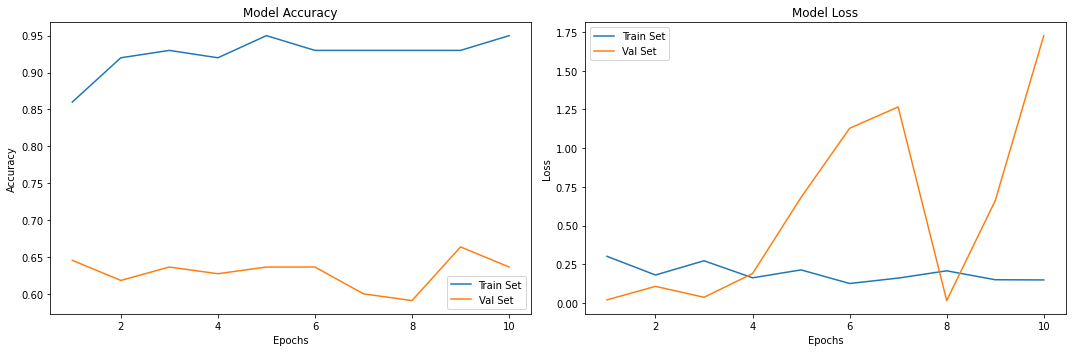

Train: 0.996
Test: 0.718
             Class 0    Class 1  ...  weighted avg                     aug
precision   0.722222   0.714286  ...      0.718254  la_muse_HorizontalFlip
recall      0.709091   0.727273  ...      0.718182  la_muse_HorizontalFlip
f1-score    0.715596   0.720721  ...      0.718159  la_muse_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  la_muse_HorizontalFlip

[4 rows x 6 columns]


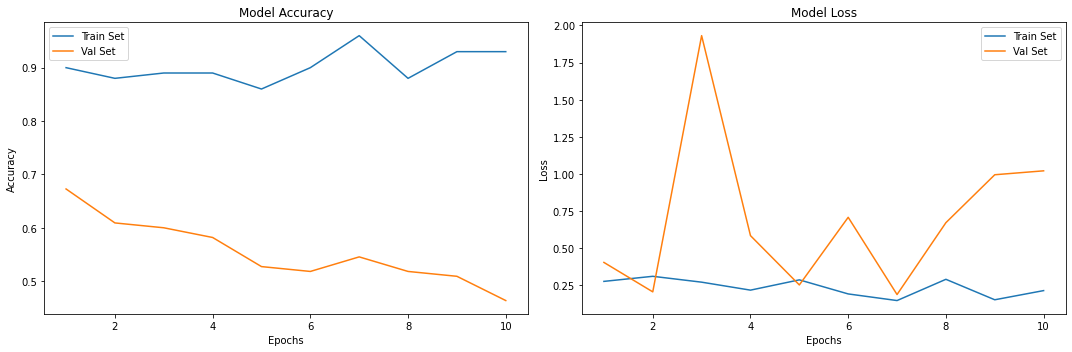

Train: 0.988
Test: 0.691
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.708333   0.661290  ...      0.684812  la_muse_vertialFLip
recall      0.618182   0.745455  ...      0.681818  la_muse_vertialFLip
f1-score    0.660194   0.700855  ...      0.680524  la_muse_vertialFLip
support    55.000000  55.000000  ...    110.000000  la_muse_vertialFLip

[4 rows x 6 columns]


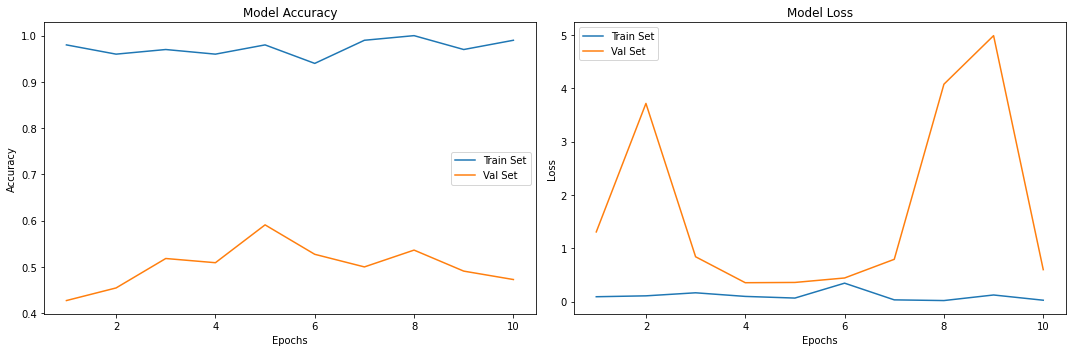

Train: 1.000
Test: 0.636
             Class 0    Class 1  ...  weighted avg               aug
precision   0.674419   0.611940  ...      0.643179  la_muse_Rotation
recall      0.527273   0.745455  ...      0.636364  la_muse_Rotation
f1-score    0.591837   0.672131  ...      0.631984  la_muse_Rotation
support    55.000000  55.000000  ...    110.000000  la_muse_Rotation

[4 rows x 6 columns]


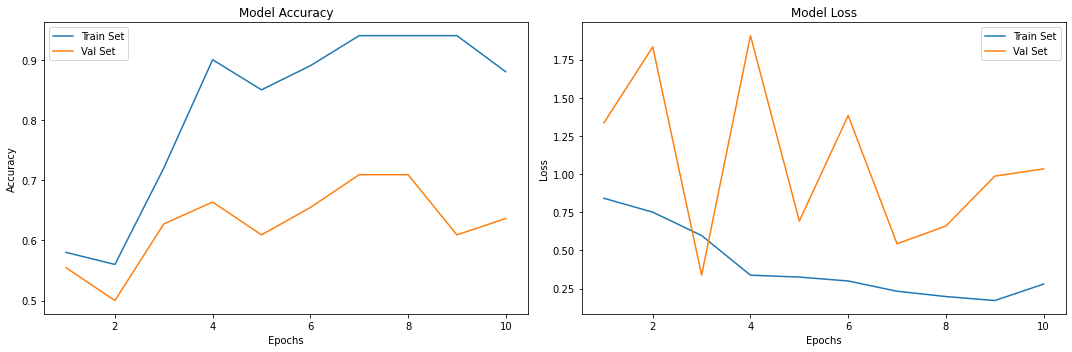

Train: 0.968
Test: 0.645
             Class 0    Class 1  ...  weighted avg            aug
precision   0.681818   0.621212  ...      0.651515  la_muse_shear
recall      0.545455   0.745455  ...      0.645455  la_muse_shear
f1-score    0.606061   0.677686  ...      0.641873  la_muse_shear
support    55.000000  55.000000  ...    110.000000  la_muse_shear

[4 rows x 6 columns]


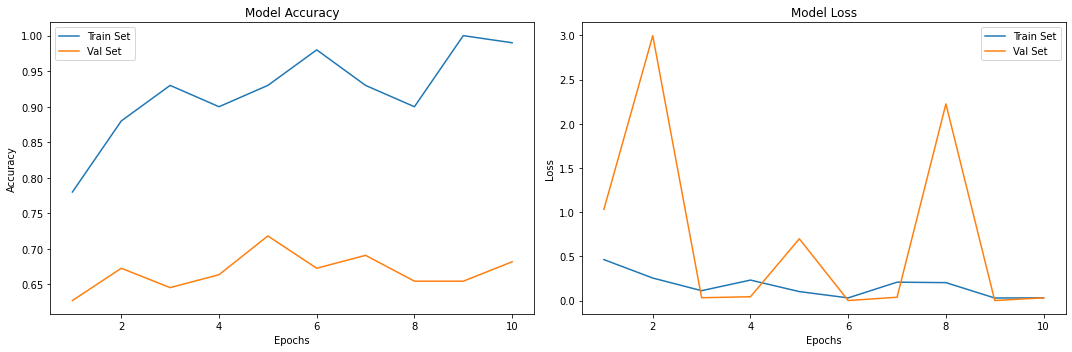

Train: 0.912
Test: 0.664
             Class 0    Class 1  ...  weighted avg                        aug
precision   0.645833   0.612903  ...      0.629368  la_muse_width_shift_range
recall      0.563636   0.690909  ...      0.627273  la_muse_width_shift_range
f1-score    0.601942   0.649573  ...      0.625757  la_muse_width_shift_range
support    55.000000  55.000000  ...    110.000000  la_muse_width_shift_range

[4 rows x 6 columns]


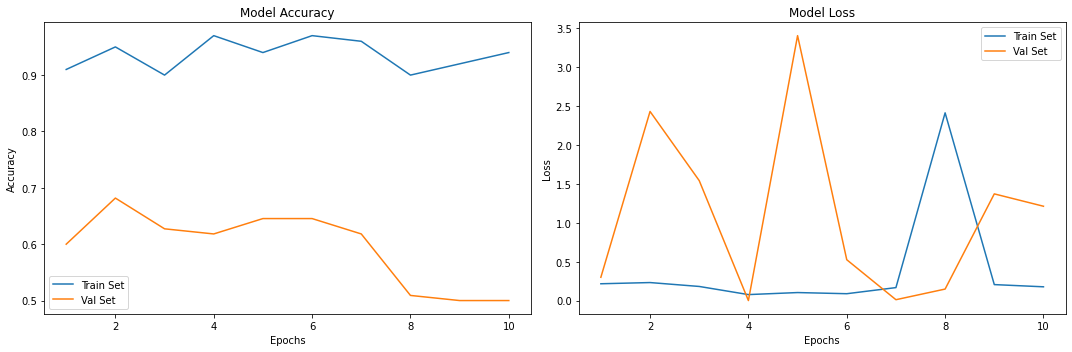

Train: 0.928
Test: 0.682
             Class 0    Class 1  accuracy   macro avg  weighted avg     aug
precision   0.708333   0.661290  0.681818    0.684812      0.684812  mosaic
recall      0.618182   0.745455  0.681818    0.681818      0.681818  mosaic
f1-score    0.660194   0.700855  0.681818    0.680524      0.680524  mosaic
support    55.000000  55.000000  0.681818  110.000000    110.000000  mosaic


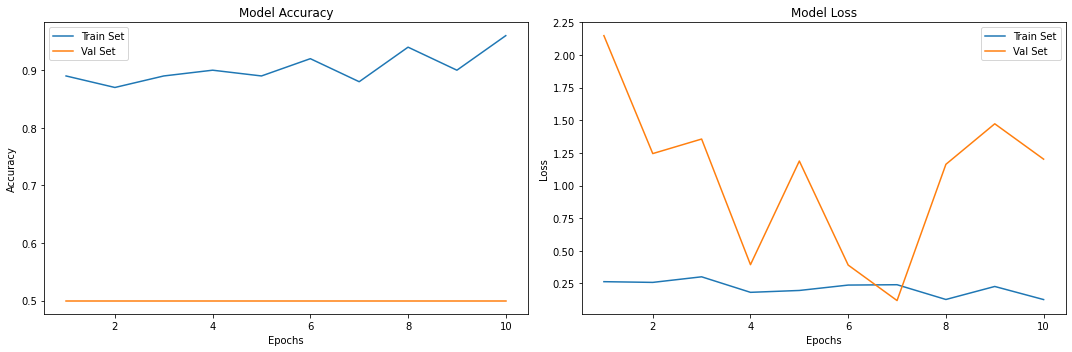

Train: 0.984
Test: 0.673
             Class 0    Class 1  ...  weighted avg                    aug
precision   0.666667   0.679245  ...      0.672956  mosaic_HorizontalFlip
recall      0.690909   0.654545  ...      0.672727  mosaic_HorizontalFlip
f1-score    0.678571   0.666667  ...      0.672619  mosaic_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  mosaic_HorizontalFlip

[4 rows x 6 columns]


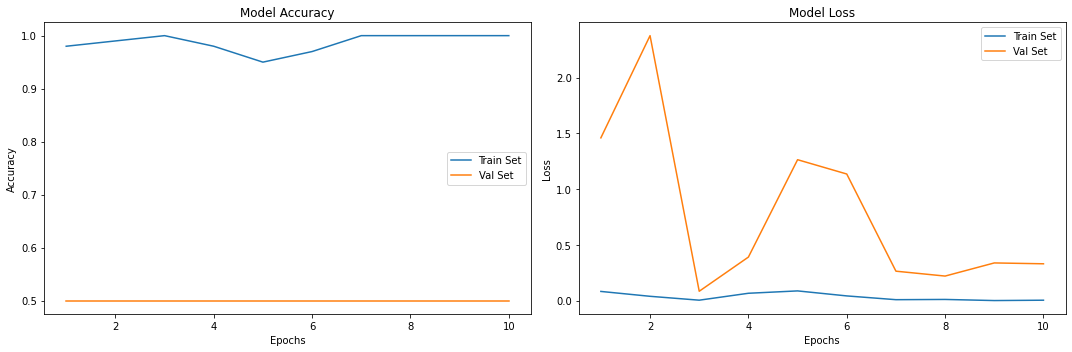

Train: 1.000
Test: 0.682
             Class 0    Class 1  ...  weighted avg                 aug
precision   0.717391   0.656250  ...      0.686821  mosaic_vertialFLip
recall      0.600000   0.763636  ...      0.681818  mosaic_vertialFLip
f1-score    0.653465   0.705882  ...      0.679674  mosaic_vertialFLip
support    55.000000  55.000000  ...    110.000000  mosaic_vertialFLip

[4 rows x 6 columns]


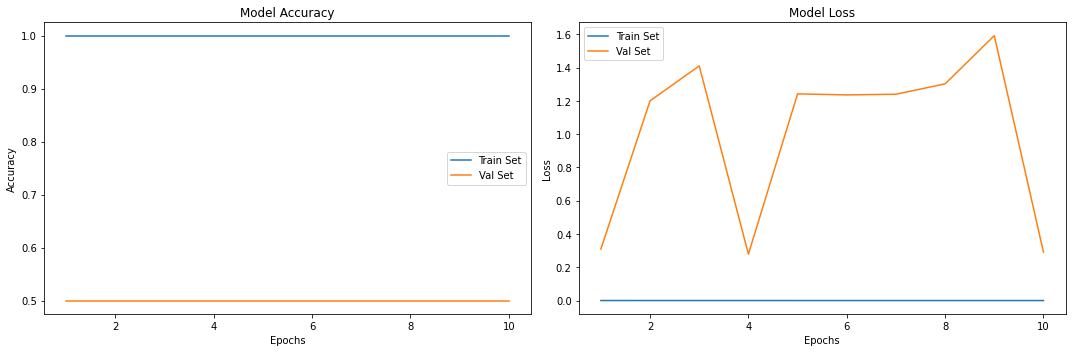

Train: 1.000
Test: 0.655
             Class 0    Class 1  ...  weighted avg              aug
precision   0.707317   0.623188  ...      0.665253  mosaic_Rotation
recall      0.527273   0.781818  ...      0.654545  mosaic_Rotation
f1-score    0.604167   0.693548  ...      0.648858  mosaic_Rotation
support    55.000000  55.000000  ...    110.000000  mosaic_Rotation

[4 rows x 6 columns]


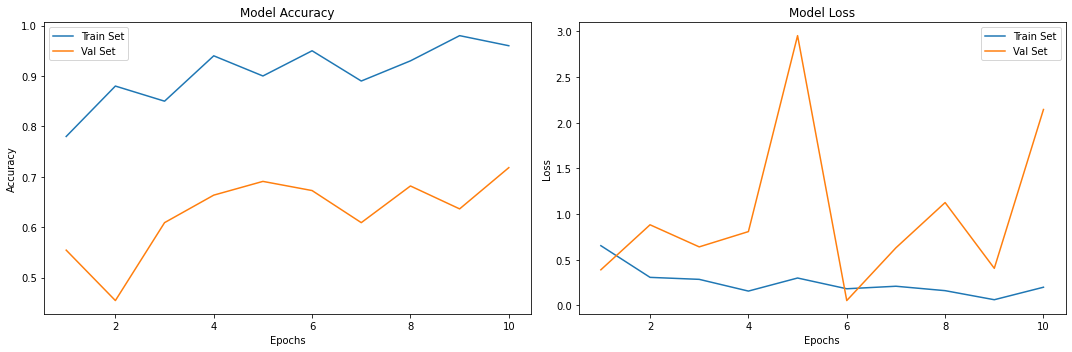

Train: 0.984
Test: 0.755
             Class 0    Class 1  ...  weighted avg           aug
precision   0.850000   0.700000  ...      0.775000  mosaic_shear
recall      0.618182   0.890909  ...      0.754545  mosaic_shear
f1-score    0.715789   0.784000  ...      0.749895  mosaic_shear
support    55.000000  55.000000  ...    110.000000  mosaic_shear

[4 rows x 6 columns]


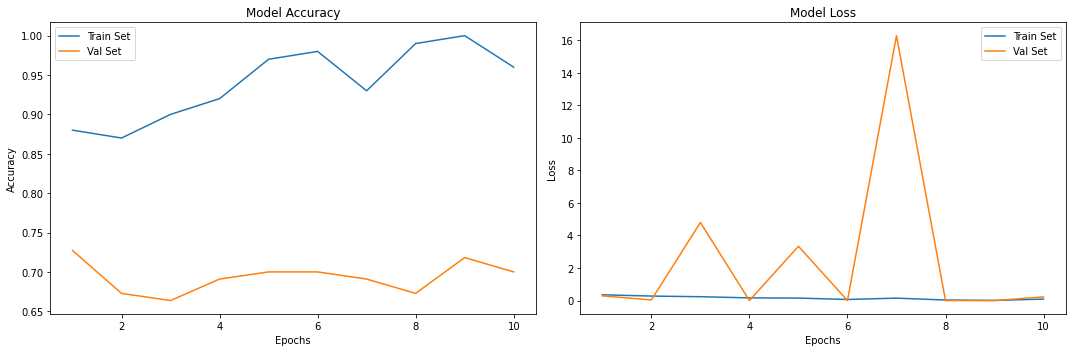

Train: 0.824
Test: 0.591
             Class 0    Class 1  ...  weighted avg                       aug
precision   0.750000   0.555556  ...      0.652778  mosaic_width_shift_range
recall      0.272727   0.909091  ...      0.590909  mosaic_width_shift_range
f1-score    0.400000   0.689655  ...      0.544828  mosaic_width_shift_range
support    55.000000  55.000000  ...    110.000000  mosaic_width_shift_range

[4 rows x 6 columns]


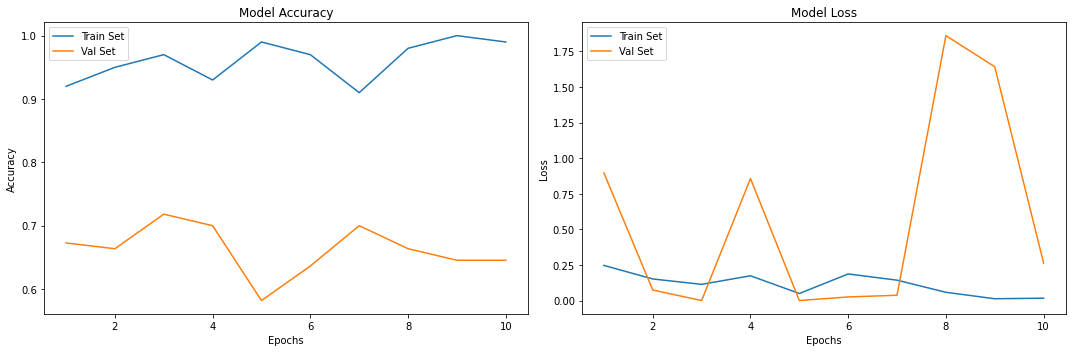

Train: 0.992
Test: 0.682
             Class 0    Class 1  accuracy   macro avg  weighted avg     aug
precision   0.685185   0.678571  0.681818    0.681878      0.681878  scream
recall      0.672727   0.690909  0.681818    0.681818      0.681818  scream
f1-score    0.678899   0.684685  0.681818    0.681792      0.681792  scream
support    55.000000  55.000000  0.681818  110.000000    110.000000  scream


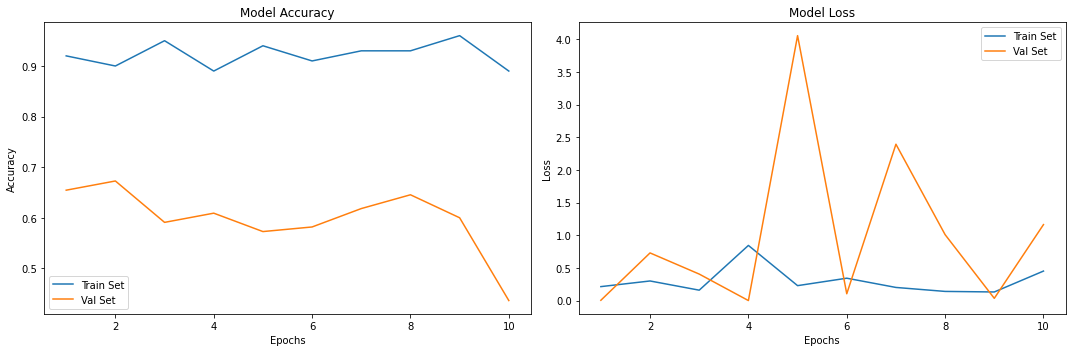

Train: 0.984
Test: 0.700
             Class 0    Class 1  ...  weighted avg                    aug
precision   0.729167   0.677419  ...      0.703293  scream_HorizontalFlip
recall      0.636364   0.763636  ...      0.700000  scream_HorizontalFlip
f1-score    0.679612   0.717949  ...      0.698780  scream_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  scream_HorizontalFlip

[4 rows x 6 columns]


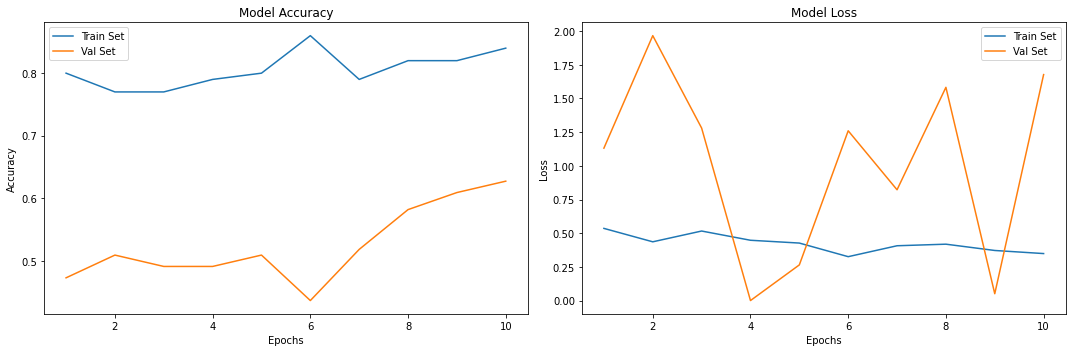

Train: 0.976
Test: 0.682
             Class 0    Class 1  ...  weighted avg                 aug
precision   0.678571   0.685185  ...      0.681878  scream_vertialFLip
recall      0.690909   0.672727  ...      0.681818  scream_vertialFLip
f1-score    0.684685   0.678899  ...      0.681792  scream_vertialFLip
support    55.000000  55.000000  ...    110.000000  scream_vertialFLip

[4 rows x 6 columns]


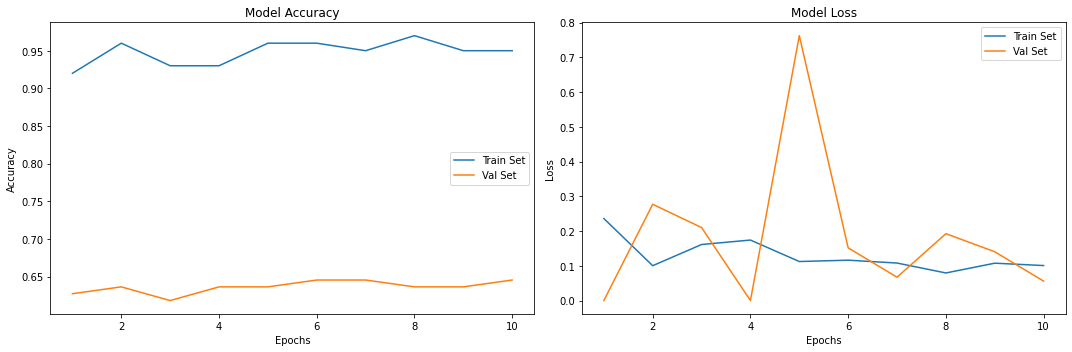

Train: 0.992
Test: 0.745
             Class 0    Class 1  ...  weighted avg              aug
precision   0.864865   0.684932  ...      0.774898  scream_Rotation
recall      0.581818   0.909091  ...      0.745455  scream_Rotation
f1-score    0.695652   0.781250  ...      0.738451  scream_Rotation
support    55.000000  55.000000  ...    110.000000  scream_Rotation

[4 rows x 6 columns]


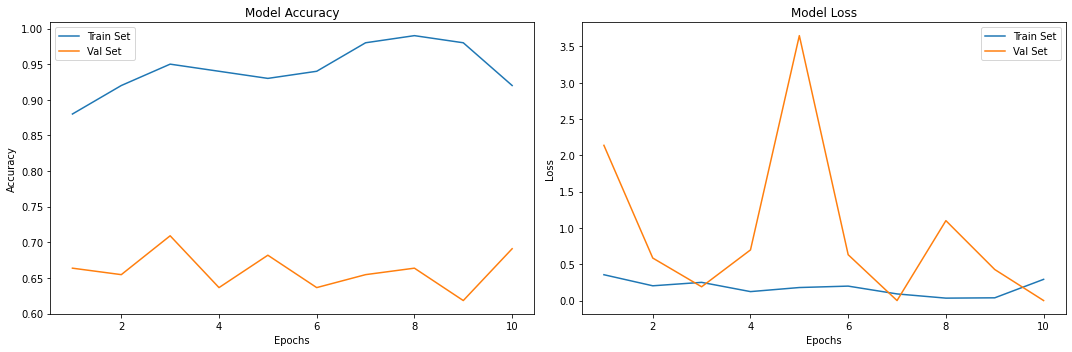

Train: 0.960
Test: 0.691
             Class 0    Class 1  ...  weighted avg           aug
precision   0.756098   0.652174  ...      0.704136  scream_shear
recall      0.563636   0.818182  ...      0.690909  scream_shear
f1-score    0.645833   0.725806  ...      0.685820  scream_shear
support    55.000000  55.000000  ...    110.000000  scream_shear

[4 rows x 6 columns]


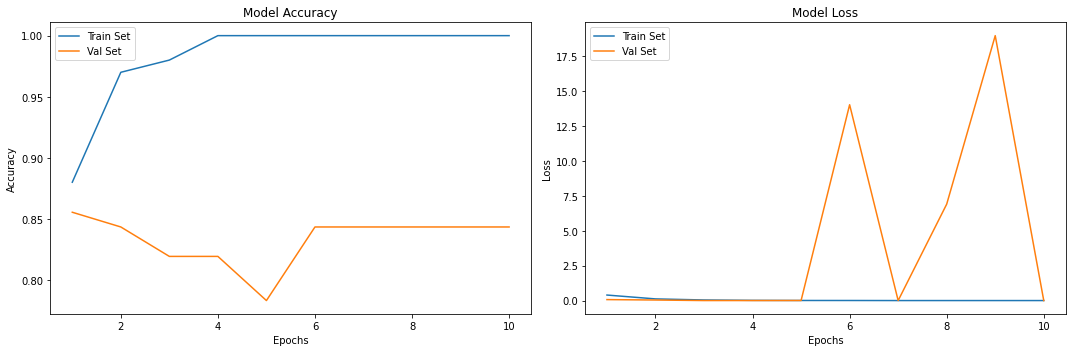

Train: 0.814
Test: 0.494
             Class 0    Class 1  ...  weighted avg                       aug
precision   0.325000   0.651163  ...      0.541132  scream_width_shift_range
recall      0.464286   0.509091  ...      0.493976  scream_width_shift_range
f1-score    0.382353   0.571429  ...      0.507644  scream_width_shift_range
support    28.000000  55.000000  ...     83.000000  scream_width_shift_range

[4 rows x 6 columns]


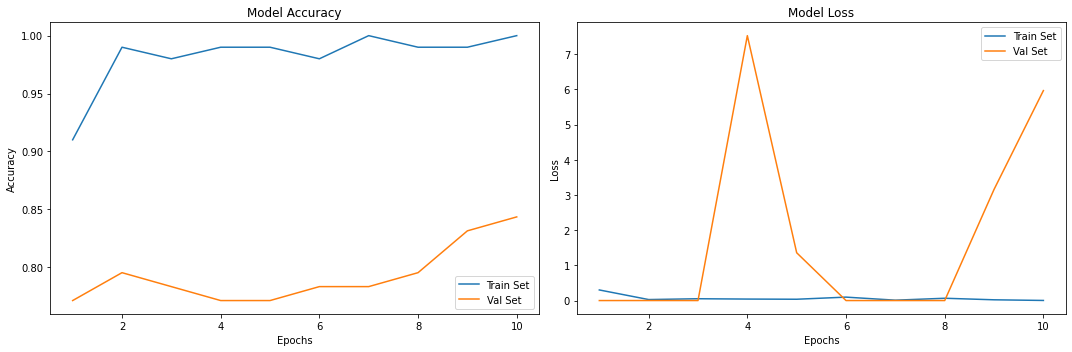

Train: 1.000
Test: 0.867
             Class 0    Class 1  ...  weighted avg            aug
precision   1.000000   0.833333  ...      0.889558  samplepair224
recall      0.607143   1.000000  ...      0.867470  samplepair224
f1-score    0.755556   0.909091  ...      0.857296  samplepair224
support    28.000000  55.000000  ...     83.000000  samplepair224

[4 rows x 6 columns]


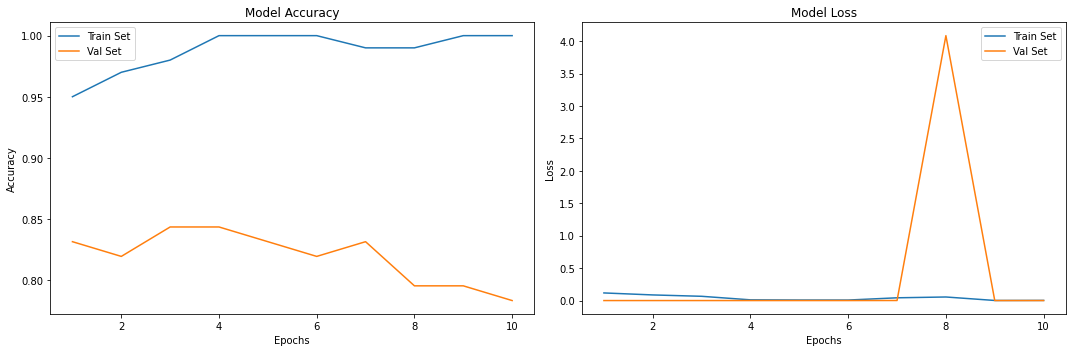

Train: 1.000
Test: 0.867
             Class 0  ...                                       aug
precision   0.904762  ...  samplepair224_HorizontalFlip_vertialFLip
recall      0.678571  ...  samplepair224_HorizontalFlip_vertialFLip
f1-score    0.775510  ...  samplepair224_HorizontalFlip_vertialFLip
support    28.000000  ...  samplepair224_HorizontalFlip_vertialFLip

[4 rows x 6 columns]


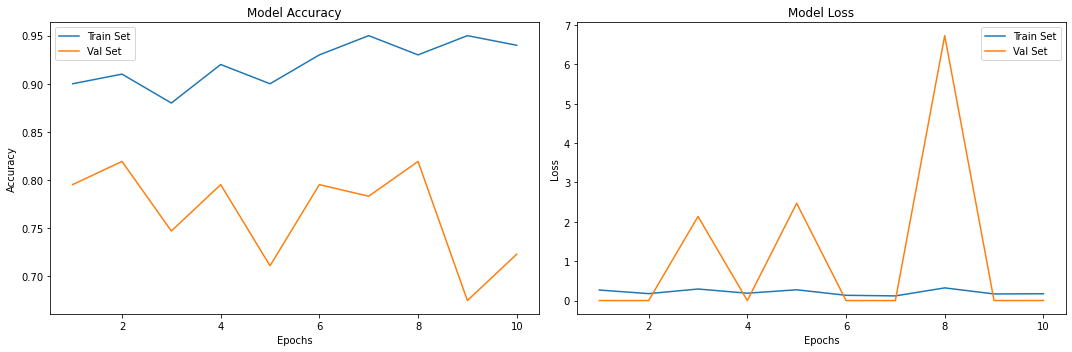

Train: 1.000
Test: 0.867
             Class 0    Class 1  ...  weighted avg                     aug
precision   0.947368   0.843750  ...      0.878706  samplepair224_Rotation
recall      0.642857   0.981818  ...      0.867470  samplepair224_Rotation
f1-score    0.765957   0.907563  ...      0.859792  samplepair224_Rotation
support    28.000000  55.000000  ...     83.000000  samplepair224_Rotation

[4 rows x 6 columns]


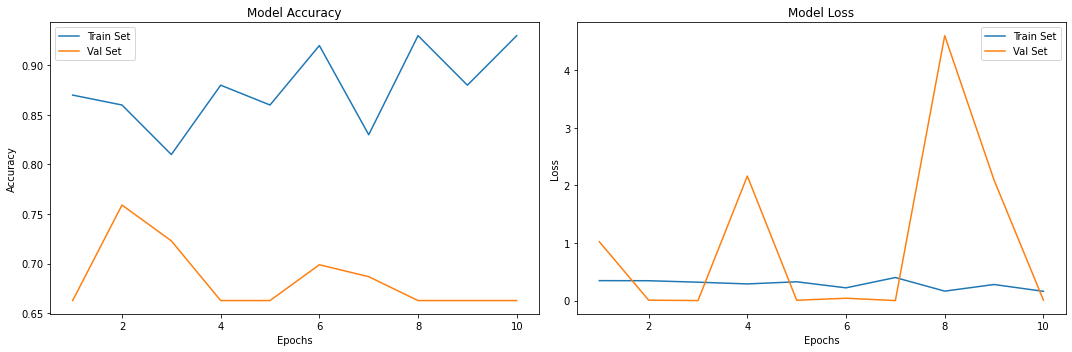

Train: 1.000
Test: 0.843
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.941176   0.818182  ...      0.859674  samplepair224_shear
recall      0.571429   0.981818  ...      0.843373  samplepair224_shear
f1-score    0.711111   0.892562  ...      0.831350  samplepair224_shear
support    28.000000  55.000000  ...     83.000000  samplepair224_shear

[4 rows x 6 columns]


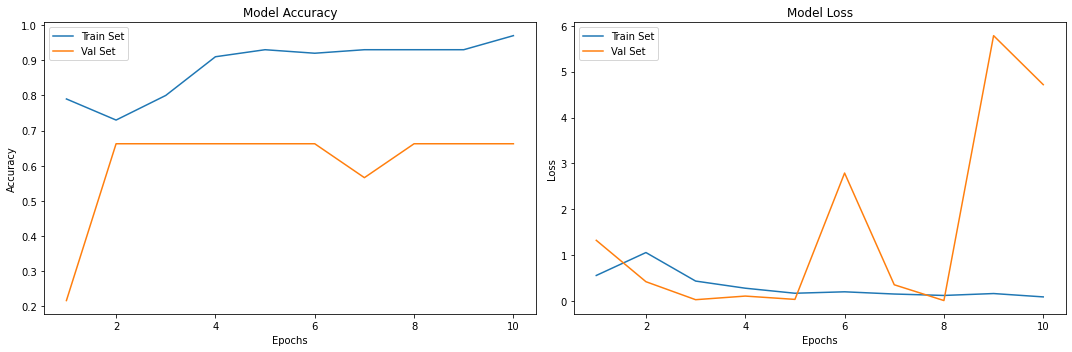

Train: 0.989
Test: 0.880
             Class 0    Class 1  ...  weighted avg                              aug
precision   1.000000   0.846154  ...      0.898054  samplepair224_width_shift_range
recall      0.642857   1.000000  ...      0.879518  samplepair224_width_shift_range
f1-score    0.782609   0.916667  ...      0.871442  samplepair224_width_shift_range
support    28.000000  55.000000  ...     83.000000  samplepair224_width_shift_range

[4 rows x 6 columns]


Class 0    Class 1  accuracy   macro avg  weighted avg  \
precision   0.705882   0.609756  0.637931    0.657819      0.656162   
recall      0.428571   0.833333  0.637931    0.630952      0.637931   
f1-score    0.533333   0.704225  0.637931    0.618779      0.621726   
support    28.000000  30.000000  0.637931   58.000000     58.000000   
precision   0.700000   0.631579  0.655172    0.665789      0.664610   
recall      0.500000   0.800000  0.655172    0.650000      0.655172   
f1-score    0.583333   0.705882  0.655172    0.644608      0.646721   
support    28.000000  30.000000  0.655172   58.000000     58.000000   
precision   0.833333   0.608696  0.655172    0.721014      0.717141   
recall      0.357143   0.933333  0.655172    0.645238      0.655172   
f1-score    0.500000   0.736842  0.655172    0.618421      0.622505   
support    28.000000  30.000000  0.655172   58.000000     58.000000   
precision   0.552632   0.650000  0.586207    0.601316      0.602995   
recall      0.750000   0.433333  0.586207    0.591667      0.586207   
f1-score    0.636364   0.520000  0.586207    0.578182      0.576176   
support    28.000000  30.000000  0.586207   58.000000     58.000000   
precision   0.555556   0.636364  0.586207    0.595960      0.597353   
recall      0.714286   0.466667  0.586207    0.590476      0.586207   
f1-score    0.625000   0.538462  0.586207    0.581731      0.580239   
support    28.000000  30.000000  0.586207   58.000000     58.000000   
precision   0.600000   0.558140  0.568966    0.579070      0.578348   
recall      0.321429   0.800000  0.568966    0.560714      0.568966   
f1-score    0.418605   0.657534  0.568966    0.538069      0.542189   
support    28.000000  30.000000  0.568966   58.000000     58.000000   
precision   0.583333   0.588235  0.586207    0.585784      0.585869   
recall      0.500000   0.666667  0.586207    0.583333      0.586207   
f1-score    0.538462   0.625000  0.586207    0.581731      0.583223   
support    28.000000  30.000000  0.586207   58.000000     58.000000   
precision   0.750000   0.619048  0.655172    0.684524      0.682266   
recall      0.428571   0.866667  0.655172    0.647619      0.655172   
f1-score    0.545455   0.722222  0.655172    0.633838      0.636886   
support    28.000000  30.000000  0.655172   58.000000     58.000000   
precision   0.772727   0.694444  0.724138    0.733586      0.732236   
recall      0.607143   0.833333  0.724138    0.720238      0.724138   
f1-score    0.680000   0.757576  0.724138    0.718788      0.720125   
support    28.000000  30.000000  0.724138   58.000000     58.000000   
precision   0.800000   0.684211  0.724138    0.742105      0.740109   
recall      0.571429   0.866667  0.724138    0.719048      0.724138   
f1-score    0.666667   0.764706  0.724138    0.715686      0.717377   
support    28.000000  30.000000  0.724138   58.000000     58.000000   
precision   0.612903   0.666667  0.637931    0.639785      0.640712   
recall      0.678571   0.600000  0.637931    0.639286      0.637931   
f1-score    0.644068   0.631579  0.637931    0.637823      0.637608   
support    28.000000  30.000000  0.637931   58.000000     58.000000   
precision   0.538462   0.562500  0.551724    0.550481      0.550895   
recall      0.500000   0.600000  0.551724    0.550000      0.551724   
f1-score    0.518519   0.580645  0.551724    0.549582      0.550653   
support    28.000000  30.000000  0.551724   58.000000     58.000000   
precision   0.727273   0.666667  0.689655    0.696970      0.695925   
recall      0.571429   0.800000  0.689655    0.685714      0.689655   
f1-score    0.640000   0.727273  0.689655    0.683636      0.685141   
support    28.000000  30.000000  0.689655   58.000000     58.000000   
precision   0.652174   0.628571  0.637931    0.640373      0.639966   
recall      0.535714   0.733333  0.637931    0.634524      0.637931   
f1-score    0.588235   0.676923  0.637931    0.632579      0.634108   
support    28.000000  30.000000  0.63

In [6]:
epochs=10
i=0
Results=pd.DataFrame([])
hist_results=[]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range'
,'Horizontal+vertical','Horizonta+Rotation','Horizonta+shear','Horizonta+width_shift_range'
,'vertialFLip+Rotation','vertialFLip+Rotation','vertialFLip+shear','vertical+width_shift_range'
,'Rotation+vertical','Horizontal+Rotation','shear+Rotation','Rotation+width_shift_range'
,'shear+vertical','Horizontal+shear','shear+Rotation','shear+width_shift_range'
,'starry_night','starry_night_HorizontalFlip','starry_night_vertialFLip','starry_night_Rotation','starry_night_shear','starry_night_width_shift_range'
,'the_wave','the_wave_HorizontalFlip','the_wave_vertialFLip','the_wave_Rotation','the_wave_shear','the_wave_width_shift_range'
,'udnie','udnie_HorizontalFlip','udnie_vertialFLip','udnie_Rotation','udnie_shear','udnie_width_shift_range'
,'candy','candy_HorizontalFlip','candy_vertialFLip','candy_Rotation','candy_shear','candy_width_shift_range'
,'composition_vii','composition_vii_HorizontalFlip','composition_vii_vertialFLip','composition_vii_Rotation','composition_vii_shear','composition_vii_width_shift_range'
,'feathers','feathers_HorizontalFlip','feathers_vertialFLip','feathers_Rotation','feathers_shear','feathers_width_shift_range'
,'la_muse','la_muse_HorizontalFlip','la_muse_vertialFLip','la_muse_Rotation','la_muse_shear','la_muse_width_shift_range'
,'mosaic','mosaic_HorizontalFlip','mosaic_vertialFLip','mosaic_Rotation','mosaic_shear','mosaic_width_shift_range'
,'scream','scream_HorizontalFlip','scream_vertialFLip','scream_Rotation','scream_shear','scream_width_shift_range'
,'samplepair224','samplepair224_HorizontalFlip_vertialFLip','samplepair224_Rotation','samplepair224_shear','samplepair224_width_shift_range'
]
# classes = np.unique(y_train)
# nClasses = len(classes)
# num_classes = len(classes)

for i in range(len(Aug)):
  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)

    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)    
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1



  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,rotation_range=(random.randrange(0,360,30)))
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==11:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,shear_range=(random.randrange(0,100,10)))
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1    

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1




  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==17:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),vertical_flip=True)
      val_datagen =ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1


  elif i==18:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),horizontal_flip=True)
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1



  elif i==19:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),rotation_range=(random.randrange(0,360,30)))
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1


  elif i==20:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),width_shift_range=(random.uniform(0.1,0.9)))
      val_datagen = ImageDataGenerator(rescale=1./255)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1



# NST style 1

  elif i==21:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==22:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==23:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==24:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==25:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==26:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 2

  elif i==27:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==28:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==29:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==30:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==31:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==32:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 3

  elif i==33:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==34:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==35:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==36:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==37:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==38:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 4

  elif i==39:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==40:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==41:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==42:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==43:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==44:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 5

  elif i==45:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==46:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==47:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==48:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==49:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==50:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 6

  elif i==51:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==52:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==53:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==54:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==55:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==56:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 7

  elif i==57:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==58:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==59:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==60:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==61:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==62:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

#  NST style 8

  elif i==63:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==64:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==65:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==66:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==67:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==68:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


#  NST style 9

  elif i==69:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==70:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==71:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==72:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==73:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==74:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

#  sample pair

  elif i==75:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==76:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==77:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen =ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==78:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==79:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==80:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


    if i==81:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)

display(Results)
